# IMPORT PACKAGES

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import umap.umap_ as umap
import seaborn as sns
import os
import hdbscan
%matplotlib inline

from sentence_transformers import SentenceTransformer
from fuzzywuzzy import process, fuzz

C:\Users\t-sadash\Anaconda3\envs\muse\lib\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


# READ DATA

In [32]:
df = pd.read_json("./data/caanrc_misinformation_tweets.json")

In [33]:
df.head()

screen_name party          created_at               id_str  \
167  1Patelzuber   INC 2020-01-22 08:00:40  1219892623948709888   
683     abhbasak   BJP 2020-01-02 08:23:38  1212650643950899200   
684     abhbasak   BJP 2020-01-02 10:26:03  1212681451176636416   
706     abhbasak   BJP 2020-01-05 15:36:52  1213846835560759296   
740     abhbasak   BJP 2020-01-13 12:39:26  1216701287414128640   

                                             full_text  \
167  aap amp bjp ally akali dal both walked out of ...   
683  here it is nexus of subversion between mamatao...   
684  i urge friends from the media to question pfi ...   
706  pfi simi sdpi have engineered violence during ...   
740  on way towards nabadvip took a detour amp visi...   

                   hashtags  retweet_count  retweet_handle  
167                      []             50         geetv79  
683                   [PFI]             20  anirbanganguly  
684                      []              3      sevakaroon  
706  [PFI, SIMI, SDPI, CAA]              8  anirbanganguly  
740    [Nabadvip, Beldanga]              9  anirbanganguly

In [34]:
df.shape[0]

17463

In [35]:
df = df.drop_duplicates(subset='full_text')

In [36]:
df.shape

(7618, 8)

In [19]:
def fuzzy_matching(x, matches):
    match = process.extractBests(x, df['full_text'].tolist(), scorer=fuzz.token_sort_ratio,
               score_cutoff = 80)
    print(len(match))
    matches.append(match)

In [20]:
matches = []
df['full_text'].apply(lambda x: fuzzy_matching(x,matches))

2
1
1
1
1
1
1
1
1
1
1
3
2
1
1
4
5
1
1
3
2
1
1
1
1
1
1
3
1
1
1
1
1
1
1
1
1
1
1
1
4
4
4
4
5
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
4
2
1
1
1
1
1
1
1
1
1
1
5
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
2
2
1
1
1
1
1
1
1
2
1
1
2
3
2
1
1
1
1
2
2
1
1
1
2
4
1
1
1
2
1
5
1
1
1
1
1
2
1
2
1
1
2
1
1
1
1
2
1
1
1
1
1
1
1
3
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
4
1
1
1
1
2
1
2
1
1
3
1
1
1
1
1
1
2
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
2
1
2
2
4
2
2
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
3
1
1
1
1
3
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
5
2
5
3
3
4
1
1
1
1
4
1
1
2
1
1
1
2
1
1
1
1
1
1
1
1
2
1
1
2
1
1
1
1
1
1
1
1
1
1
2
1
2
2
1
1
1
1
1
1
1
1
1
3
1
5
5
3
1
1
1
4
1
1
1
1
1
1
3
1
1
1
1
1
1
3
1
1
1
1
1
1
1
1
1
1
3
5
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
5
2
3
5
1
1
2
1
1
1
1
1
1
1
1
2
1
5
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1


1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
2
2
4
1
1
2
1
1
2
1
1
1
1
1
3
3
3
1
1
1
1
1
1
2
1
1
1
2
1
1
1
1
1
1
4
1
1
1
1
1
1
5
1
1
1
1
1
1
1
1
1
5
1
1
1
1
1
1
1
2
1
1
1
1
1
1
3
3
3
1
1
1
1
1
1
1
1
3
2
1
1
4
1
1
1
1
1
1
1
1
3
1
1
1
1
1
1
2
3
2
4
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
2
1
1
1
4
4
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
4
1
2
1
2
1
1
1
1
1
1
1
1
1
1
1
1
5
1
1
1
2
1
1
1
1
5
4
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
5
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
2
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
3
1
1
1
2
1
5
5
5
5
1
1
1
1
1
5
1
1
1
5
5
5
5
2
1
1
4
5
1
2
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
4
1
2
1
4
1
1
1
1
3
2
1
1
1
1
1
1
1
1
1
1
1
2
2
1
1
1
1
1
1
1
3
1
1
1
1
1
1
1
1
1
1
1
3
1
2
1
1
1
2
2
1
1
2
1
1
1
1
1
1
1
3
1
1
1
4
1
1
1
1
1
2
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
2
3
3
2
2
1
2


167        None
683        None
684        None
706        None
740        None
           ... 
1147204    None
1147205    None
1147208    None
1147232    None
1147340    None
Name: full_text, Length: 7618, dtype: object

In [120]:
import pickle

with open ('caanrc_fuzzy_matches', 'wb') as f:
    pickle.dump(matches,f)

In [39]:
for match in matches:
    if len(match) > 1:
        print(match)
        for i in range(1,len(match)):
            df.drop(df[df['full_text'] == match[i][0]].index, inplace = True)
        print("Deleted {} Rows".format(len(match)-1))

[('aap amp bjp ally akali dal both walked out of punjab assembly when a resolution against caa was passed after voting with bjprss on art 370 amp dismemberment of kashmir under presidents rule aap again sides with bjprss on caa aapisbjp aapdhokebaazhai  ', 100), ('aap amp bjp ally akali dal both walked out of punjab assembly when a resolution against caa was passed after voting with bjprss on art 370 amp dismemberment of kashmir under presidents rule aap again sides with bjprss on caa aapisbjp aapdhokebaazhai ', 100)]
Deleted 1 Rows
[('congress trying to instigate students and using them as pawns to further their petty political interests on the name of citizenship amendment act congresssponsoredviolence ', 100), ('congress trying to instigate students and using them as pawns to further their petty political interests on the name of citizenship amendment act congresssponsoredviolence sunilambekarm ashishsainram', 92), ('congress trying to instigate students and using them as pawns to f

Deleted 1 Rows
[('pfi has emerged as the unifying thread for organising violent protests against caa ', 100), ('pfi has emerged as the unifying thread for organising violent protests against caa  via swarajyamag', 91)]
Deleted 1 Rows
[('shaheenbaghsham  bjp sting video claims shaheen bagh protest congresssponsored people getting rs 500day ', 100), ('protestonhire  bjp sting video claims shaheen bagh protest congresssponsored people getting rs 500day ', 85)]
Deleted 1 Rows
[('up police arrest 3 pfi members from lucknow 5 from kanpur for anticaa riots ', 100), ('up police arrest 3 pfi members from lucknow 5 from kanpur for anticaa riots  ', 100)]
Deleted 1 Rows
[('150 members of radical islamist outfit pfi entered delhi hid in jamia area 2 days before anticaa riots police on jamia millia islamia riots ', 100), ('150 members of radical islamist outfit pfi entered delhi hid in jamia area 2 days before anticaa riots police on jamiaprotest ', 89), ('150 members of radical islamist outfit pfi

[('anti caa protests are not organic pfi and sdpi are involved in anti caa violence gazvaahind agenda behind anti caaanti hindu riots jihadis have spread riots in delhi and surrounding areas in protest against caa anticaariots2020  ', 100), ('anti caa protests are not organic  pfi and sdpi are involved in anti caa violence  gazvaahind agenda behind anti caa anti hindu riots  jihadis have spread riots in delhi and surrounding areas in protest against caa anticaariots2020  ', 98), ('anti caa protests are not organic  pfi and sdpi are involved in anti caa violence  jihadis have spread riots in delhi and surrounding areas in protest against caa anticaariots2020  ', 88)]
Deleted 2 Rows
[('simi pfi behind caa violence intel reveals ', 100), ('simi pfi behind caa violence intel  ', 89), ('no shocker simi pfi behind caa violence intel reveals ', 88), ('big revelation  simi pfi behind caa violence intel reveals ', 85)]
Deleted 3 Rows
[('sudhirchaudhary well done sudhir and deepak you tried your

Deleted 4 Rows
[('anti caa protests are not organic  pfi and sdpi are involved in anti caa violence  jihadis have spread riots in delhi and surrounding areas in protest against caa anticaariots2020  ', 100), ('anti caa protests are not organic  pfi and sdpi are involved in anti caa violence  gazvaahind agenda behind anti caa anti hindu riots  jihadis have spread riots in delhi and surrounding areas in protest against caa anticaariots2020  ', 82)]
Deleted 1 Rows
[('ed fails bjp in delhi as its expos linking muslim outfit pfi to shaheen bagh collapses theprints ananya bhardwaj bhardwajananya reports ', 100), ('ed fails bjp in delhi as its expos linking muslim outfit pfi to shaheen bagh bombs theprints ananya bhardwaj bhardwajananya reports ', 96)]
Deleted 1 Rows
[('uttar pradesh dgp op singh writes letter to ministry of home affairs requesting to impose a ban on popular front of india pfi as investigations found pfis involvement in the violent protests against citizenshipamendmentact tha

Deleted 1 Rows
[('big question do these dired papers expose the pfitukde lobby link in organising anticaa agitation tweet your view with tukdefundedcaastir ', 100), ('dired big question to the pfi do these dired papers expose the pfitukde lobby link in organising anticaa agitation tweet your views with tukdefundedcaastir ', 94)]
Deleted 1 Rows
[('bjps kapilmishraind whos video of instigating crowds to violence in north east delhi during anticaa protests is in public domain nowhe is trending tahirhussainterrorist everyone knows both of them were good friends          milligazette ', 100), ('bjps kapilmishraind whos video of instigating crowds to violence in north east delhi during anticaa protests is in public domain now he is trending tahirhussainterrorist everyone knows both of them were good friends then kapil left aamaadmiparty ', 80)]
Deleted 1 Rows
[('shaheen bagh is a horror film that continues to be played even though it has flopped badly my views on timesnow with navikakumar sh

Deleted 1 Rows
[('banpfi involving in  lovejihad  anti  caa violence  forceful conversions  anti  national activities  bangalore and delhi riots  killing of hindu leaders we urge hmoindia to impose total ban on pfi with no delay ', 100), ('banpfi pfi involving in  lovejihad  anti  caa violence  forceful conversions  anti  national activities  bangalore and delhi riots  killing of hindu leaders we urge hmoindia to impose total ban on pfi with no delay pfiexposed', 96)]
Deleted 1 Rows
[('so the man behind shaheen bagh shooting is aap worker aapburnsdelhi aapketerrorists ', 100), ('so the man behind shaheen bagh shooting is aap worker aapketerrorists ', 91)]
Deleted 1 Rows
[('savedelhihindus the goons are provoked by congress aap and intellectual terrorists under the deliberate misinformation on caa now the property of hindus being destroyed and they are being butchered now who will bear responsibility of loss', 100), ('the goons are provoked by congress aap and intellectual terrorists un

Deleted 2 Rows
[('how many resident indians lost their citizenships due to the caa swara  she helped too incite delhi rits in jafrabad dear delhi police arrestswarabhaskar ', 100), ('how many resident indians lost their citizenships due to the caa swara  she helped too incite delhi rits in jafrabad dear delhi police arrestswarabhaskar', 100), ('how many resident indians lost their citizenships due to the caa reallyswara arrestswarabhaskar she helped too incite delhi riots in jafrabad that claimed lives of 50 innocent people ', 82)]
Deleted 2 Rows
[('congress trying to instigate students and using them as pawns to further their petty political interests on the name of citizenship amendment act shriniwashr nidhitripathi92 abvpvoice congresssponsoredviolence ', 100), ('congress trying to instigate students and using them as pawns to further their petty political interests on the name of citizenship amendment act congresssponsoredviolence ', 90), ('congress trying to instigate students and

Deleted 2 Rows
[('meerutpolice release video tapes on anticaa showdown and link pfi to violence amp riots join rahul shivshankar on india upfront tonight at 8 pm  tweet with caapfilinktapes ', 100), ('meerutpolice release video tapes on anticaa showdown and link pfi to violence amp riots tune in to times now with rahul shivshankar on india upfront  tweet with caapfilinktapes ', 89), ('caapfilinktapes  meerutpolice release video tapes on anticaa showdown and link pfi to violence amp riots times nows vivek narayan with details  india upfront with rahul shivshankar ', 83), ('meerutpolice release video tapes on anticaa showdown and link pfi to violence amp riots join navika kumar on thenewshour tonight at 9 pm  tweet with caapfilinktapes ', 82)]
Deleted 3 Rows
[('meerutpolice release video tapes on anticaa showdown and link pfi to violence amp riots tune in to times now with rahul shivshankar on india upfront  tweet with caapfilinktapes ', 100), ('meerutpolice release video tapes on antica

Deleted 1 Rows
[('the dired has unearthed a link between pfi and protests against caa2019 that have been raging on across india heres more  your take  caanrcnpr caaprotests ', 100), ('dired unearths a link between pfi and caaprotests that have been raging on across india  your take   caanrcnpr caa2019 caanrc ', 83)]
Deleted 1 Rows
[('dired unearths a link between pfi and caaprotests that have been raging on across india  your take   caanrcnpr caa2019 caanrc ', 100), ('the dired has unearthed a link between pfi and protests against caa2019 that have been raging on across india heres more  your take  caanrcnpr caaprotests ', 83)]
Deleted 1 Rows
[('the uttarpradeshpolice have arrested five members of the popular front of india pfi on charges of instigating violence against the citizenship amendment act caa and the national register of citizens nrc in kanpur ', 100), ('police have arrested 5 members of the popular front of india pfi on charges of instigating violence against citizenship am

Deleted 4 Rows
[('times now accesses pictures depicting shaheen gun man with aamaadmipartys top leadership aap pledges desh bhakti lessons but plots shaheen bagh saazish has pms prayog taunt been vindicated watch rahul shivshankar on india upfront at 8 pm  aapshaheengunmanlink ', 100), ('times now accesses pictures depicting shaheen gunman with aamaadmipartys top leadership aap pledges desh bhakti lessons but plots shaheen bagh saazish has pms prayog taunt been vindicated watch rahul shivshankar on india upfront at 8 pm  aapshaheengunmanlink ', 87)]
Deleted 1 Rows
[('times now is the only channel with visual proof which shows shaheen gunman has aamaadmiparty links join rahul shivshankar on india upfront tonight at 8 pm  tweet with aapshaheengunmanlink ', 100), ('times now is the only channel with visual proof which shows shaheen gun man has aamaadmiparty links join rahul shivshankar on india upfront tonight at 8 pm  tweet with aapshaheengunmanlink ', 98), ('times now is the only channe

Deleted 1 Rows
[('shaheenbaghscam  nobody on this panel looks anything about this shaheen bagh ive been living in this vicinity dr tasleem ahmed rehmani president of muslim political council of india amp leader sdpi ', 100), ('shaheenbaghscam  nobody on this panel looks anything about this shaheen bagh ive been living in this vicinity dr tasleem ahmed rehmani president of muslim political council of india amp leader sdpi  ', 100)]
Deleted 1 Rows
[('shaheenbaghscam  nobody on this panel looks anything about this shaheen bagh ive been living in this vicinity dr tasleem ahmed rehmani president of muslim political council of india amp leader sdpi ', 100), ('shaheenbaghscam  nobody on this panel looks anything about this shaheen bagh ive been living in this vicinity dr tasleem ahmed rehmani president of muslim political council of india amp leader sdpi  ', 100)]
Deleted 1 Rows
[('massive crackdown on pfi over anticaa violence ed raids 26 locations countrywide ', 100), ('pficrackdown  massiv

Deleted 2 Rows
[('uttar pradesh police sought a ban on the pfi suspecting the organisations complicity in the statewide violent protests against the caa ', 100), ('in december 2019 uttarpradesh police sought a ban on pfi suspecting the organisations complicity in the statewide protests against caa ', 83)]
Deleted 1 Rows
[('up seeks ban on pfi for anticaa violence ', 100), ('up seeks ban on pfi for anticaa violence  via economictimes', 82)]
Deleted 1 Rows
[('barkhatrehan16 victoriousnamo shaheenbagh payment structure 0600  1400 shiftgt 700 1400  2200 shiftgt500 2200  0600 shiftgt 1000 foodsnacksteawater free daily cost 3crs total cost so far 140crs it cant go on for long as its already hurting the real financiers shaheenbaghkasach', 100), ('shaheenbagh payment structure 0600  1400 shiftgt 700 1400  2200 shiftgt500 2200  0600 shiftgt 1000 foodsnacksteawater free daily cost 3crs total cost so far 140crs it cant go on for long as its already hurting the real financiers shaheenbaghkasach ',

Deleted 2 Rows
[('‡§™‡§π‡§≤‡•á ‡§ï‡§∂‡•ç‡§Æ‡•Ä‡§∞ ‡§Æ‡•á‡§Ç ‡§™‡§§‡•ç‡§•‡§∞ ‡§Æ‡§æ‡§∞‡§®‡•á ‡§ï‡•á ‡§™‡•à‡§∏‡•á ‡§Æ‡§ø‡§≤‡§§‡•á ‡§•‡•á ‡§Ö‡§¨ ‡§¶‡§ø‡§≤‡•ç‡§≤‡•Ä ‡§ï‡•á ‡§∂‡§æ‡§π‡•Ä‡§® ‡§¨‡§æ‡§ó ‡§Æ‡•á‡§Ç ‡§ß‡§∞‡§®‡•á ‡§™‡§∞ ‡§¨‡•à‡§†‡§®‡•á ‡§ï‡•á 500 ‡§Æ‡§ø‡§≤‡§§‡•á ‡§π‡•à ‡•§ ‡§∞‡§ø‡§∂‡•ç‡§§‡§æ ‡§µ‡§π‡•Ä‡§Ç ‡§∏‡•ã‡§ö ‡§®‡§à üòâ‚ò∫Ô∏è ‡§∏‡§π‡•Ä ‡§ï‡§π‡§æ real_anuj real_atul1‡§≠‡§æ‡§à ‡§∂‡§æ‡§π‡•Ä‡§®_‡§¨‡§æ‡§ó_‡§ï‡•Ä_‡§¨‡§ø‡§ï‡§æ‡§ä_‡§î‡§∞‡§§‡•á ‡§∂‡§æ‡§π‡•Ä‡§®_‡§¨‡§æ‡§ó‡§ñ‡§æ‡§≤‡•Ä‡§ï‡§∞‡•ã', 100), ('‡§™‡§π‡§≤‡•á ‡§ï‡§∂‡•ç‡§Æ‡•Ä‡§∞ ‡§Æ‡•á‡§Ç ‡§™‡§§‡•ç‡§•‡§∞ ‡§Æ‡§æ‡§∞‡§®‡•á ‡§ï‡•á ‡§™‡•à‡§∏‡•á ‡§Æ‡§ø‡§≤‡§§‡•á ‡§•‡•á ‡§Ö‡§¨ ‡§¶‡§ø‡§≤‡•ç‡§≤‡•Ä ‡§ï‡•á ‡§∂‡§æ‡§π‡•Ä‡§® ‡§¨‡§æ‡§ó ‡§Æ‡•á‡§Ç ‡§ß‡§∞‡§®‡•á ‡§™‡§∞ ‡§¨‡•à‡§†‡§®‡•á ‡§ï‡•á 500 ‡§Æ‡§ø‡§≤‡§§‡•á ‡§π‡•à ‡•§ ‡§∞‡§ø‡§∂‡•ç‡§§‡§æ ‡§µ‡§π‡•Ä‡§Ç ‡§∏‡•ã‡§ö ‡§®‡§à üòâ ‡§∂‡§æ‡§π‡•Ä‡§®_‡§¨‡§æ‡§ó_‡§ï‡•Ä_‡§¨‡§ø‡§ï‡§æ‡§ä_‡§î‡§∞‡§§‡•á ‡§∂‡§æ‡§π‡•Ä‡§®_‡§¨‡§æ‡§ó‡§ñ‡§æ‡§≤‡•Ä‡§ï‡§∞‡•ã', 90)]
Deleted 1 Rows
[('‡§∏‡•Å‡§®‡§æ ‡§π‡•à ‡§∂‡§æ‡§π‡•Ä‡§® ‡§¨‡§æ‡§ó

Deleted 4 Rows
[('chaubeyvipin1 sudhirchaudhary ‡§∏‡§≠‡•Ä ‡§¶‡•á‡§∂‡§µ‡§æ‡§∏‡§ø‡§Ø‡•ã‡§Ç ‡§∏‡•á ‡§Ö‡§™‡•Ä‡§≤ ‡§∂‡§æ‡§π‡•Ä‡§®_‡§¨‡§æ‡§ó ‡§ü‡•Å‡§ï‡§°‡§º‡•á_‡§ü‡•Å‡§ï‡§°‡§º‡•á_‡§ó‡•à‡§Ç‡§ó ‡§ï‡•á ‡§ñ‡§§‡§∞‡§®‡§æ‡§ï ‡§Æ‡§Ç‡§∏‡•Ç‡§¨‡•ã ‡§ï‡•ã ‡§®‡•á‡§∏‡•ç‡§§‡§®‡§æ‡§¨‡•Ç‡§§ ‡§ï‡§∞‡§®‡§æ ‡§π‡•à‡•§ ‡§ú‡•ã‡§∞ ‡§∏‡•á ‡§¨‡•ã‡§≤‡§ø‡§Ø‡•á ‡§∂‡§æ‡§π‡•Ä‡§®_‡§¨‡§æ‡§ó_‡§§‡•å‡§π‡•Ä‡§®_‡§¨‡§æ‡§ó ‡§∂‡§æ‡§π‡•Ä‡§®_‡§¨‡§æ‡§ó_‡§§‡•å‡§π‡•Ä‡§®_‡§¨‡§æ‡§ó ‡§∂‡§æ‡§π‡•Ä‡§®_‡§¨‡§æ‡§ó_‡§§‡•å‡§π‡•Ä‡§®_‡§¨‡§æ‡§ó ‡§∂‡§æ‡§π‡•Ä‡§®_‡§¨‡§æ‡§ó_‡§§‡•å‡§π‡•Ä‡§®_‡§¨‡§æ‡§ó ‡§∂‡§æ‡§π‡•Ä‡§®_‡§¨‡§æ‡§ó_‡§§‡•å‡§π‡•Ä‡§®_‡§¨‡§æ‡§ó ‡§∂‡§æ‡§π‡•Ä‡§®_‡§¨‡§æ‡§ó_‡§∂‡§∞‡•ç‡§Æ‡§®‡§æ‡§ï_‡§¨‡§æ‡§ó ‡§≠‡§æ‡§∞‡§§_‡§Æ‡§æ‡§§‡§æ_‡§ï‡•Ä_‡§ú‡§Ø', 100), ('sudhirchaudhary ‡§∏‡§≠‡•Ä ‡§¶‡•á‡§∂‡§µ‡§æ‡§∏‡§ø‡§Ø‡•ã‡§Ç ‡§∏‡•á ‡§Ö‡§™‡•Ä‡§≤ ‡§∂‡§æ‡§π‡•Ä‡§®_‡§¨‡§æ‡§ó ‡§ü‡•Å‡§ï‡§°‡§º‡•á_‡§ü‡•Å‡§ï‡§°‡§º‡•á_‡§ó‡•à‡§Ç‡§ó ‡§ï‡•á ‡§ñ‡§§‡§∞‡§®‡§æ‡§ï ‡§Æ‡§Ç‡§∏‡•Ç‡§¨‡•ã ‡§ï‡•ã ‡§®‡•á‡§∏‡•ç‡§§‡§®‡§æ‡§¨‡•Ç‡§§ ‡§ï‡§∞‡§®‡§æ ‡§π‡•à‡•§ ‡§ú‡•ã‡§∞ ‡§∏‡•á ‡§¨‡•ã‡§≤‡§ø‡§Ø‡•á ‡§∂‡§æ‡§

Deleted 1 Rows
[('‡§∏‡§ø‡§∏‡•ã‡§¶‡§ø‡§Ø‡§æ ‡§ï‡§æ ‡§∂‡§æ‡§π‡•Ä‡§® ‡§¨‡§æ‡§ó ‡§∏‡•á ‡§™‡•Ç‡§∞‡•Ä ‡§¶‡§ø‡§≤‡•ç‡§≤‡•Ä ‡§π‡•à ‡§™‡§∞‡•á‡§∂‡§æ‡§® ‡§Ö‡§¨ ‡§¶‡§ø‡§≤‡•ç‡§≤‡•Ä ‡§∏‡§ø‡§∏‡•ã‡§¶‡§ø‡§Ø‡§æ ‡§ó‡•à‡§Ç‡§ó ‡§ï‡•Ä ‡§Æ‡§ø‡§ü‡§æ‡§è‡§ó‡•Ä ‡§®‡§æ‡§Æ‡•ã‡§®‡§ø‡§∂‡§æ‡§® shaheenbaghkasach shaheenbagh aapwasted5years jhoothiaapsarkar via mynt kejriwalexposed', 100), ('‡§∏‡§ø‡§∏‡•ã‡§¶‡§ø‡§Ø‡§æ ‡§ï‡§æ ‡§∂‡§æ‡§π‡•Ä‡§® ‡§¨‡§æ‡§ó ‡§∏‡•á ‡§™‡•Ç‡§∞‡•Ä ‡§¶‡§ø‡§≤‡•ç‡§≤‡•Ä ‡§π‡•à ‡§™‡§∞‡•á‡§∂‡§æ‡§® ‡§Ö‡§¨ ‡§¶‡§ø‡§≤‡•ç‡§≤‡•Ä ‡§∏‡§ø‡§∏‡•ã‡§¶‡§ø‡§Ø‡§æ ‡§ó‡•à‡§Ç‡§ó ‡§ï‡•Ä ‡§Æ‡§ø‡§ü‡§æ‡§è‡§ó‡•Ä ‡§®‡§æ‡§Æ‡•ã‡§®‡§ø‡§∂‡§æ‡§® shaheenbaghkasach shaheenbagh aapwasted5years jhoothiaapsarkar via mynt', 95), ('‡§∏‡§ø‡§∏‡•ã‡§¶‡§ø‡§Ø‡§æ ‡§ï‡§æ ‡§∂‡§æ‡§π‡•Ä‡§® ‡§¨‡§æ‡§ó ‡§∏‡•á ‡§™‡•Ç‡§∞‡•Ä ‡§¶‡§ø‡§≤‡•ç‡§≤‡•Ä ‡§π‡•à ‡§™‡§∞‡•á‡§∂‡§æ‡§® ‡§Ö‡§¨ ‡§¶‡§ø‡§≤‡•ç‡§≤‡•Ä ‡§∏‡§ø‡§∏‡•ã‡§¶‡§ø‡§Ø‡§æ ‡§ó‡•à‡§Ç‡§ó ‡§ï‡•Ä ‡§Æ‡§ø‡§ü‡§æ‡§è‡§ó‡•Ä ‡§®‡§æ‡§Æ‡•ã‡§®‡§ø‡§∂‡§æ‡§® shaheenbaghkasach shaheenbagh aapwasted5years jhoothiaapsarkar', 92)]
D

Deleted 1 Rows
[('‡§∞‡§µ‡•Ä‡§∂ ‡§ï‡•Å‡§Æ‡§æ‡§∞ ‡§ï‡•á ‡§∏‡§æ‡§• ‡§Ü‡§™ ‡§¶‡•á‡§ñ ‡§∞‡§π‡•á ‡§π‡•à ndtv ravishkumar ‡§∂‡§æ‡§π‡§ø‡§®‡§¨‡§æ‡§ó_‡§ï‡§æ_‡§≠‡§Ç‡§°‡§æ‡§´‡•ã‡§°‡§º jamia fridayfeeling via mynt', 100), ('‡§∞‡§µ‡•Ä‡§∂ ‡§ï‡•Å‡§Æ‡§æ‡§∞ ‡§ï‡•á ‡§∏‡§æ‡§• ‡§Ü‡§™ ‡§¶‡•á‡§ñ ‡§∞‡§π‡•á ‡§π‡•à ndtv ravishkumar ‡§∂‡§æ‡§π‡§ø‡§®‡§¨‡§æ‡§ó_‡§ï‡§æ_‡§≠‡§Ç‡§°‡§æ‡§´‡•ã‡§°‡§º jamia fridayfeeling', 95)]
Deleted 1 Rows
[('‡§ú‡•ã ‡§≤‡•ã‡§ó ‡§ï‡§π‡§§‡•á ‡§π‡•à‡§Ç ‡§Æ‡•Å‡§∏‡§≤‡§Æ‡§æ‡§® ‡§à‡§Æ‡§æ‡§® ‡§®‡§π‡•Ä‡§Ç ‡§¨‡•á‡§ö‡§§‡§æ ‡§µ‡•ã ‡§∂‡§æ‡§π‡•Ä‡§® ‡§¨‡§æ‡§ó ‡§ú‡§æ‡§ï‡§∞ ‡§¶‡•á‡§ñ‡•á‡§Ç 500 700 ‡§Æ‡•á‡§Ç ‡§¨‡§ø‡§ï ‡§∞‡§π‡§æ ‡§π‡•à ü§îüòèüòÇ‡§∂‡§æ‡§π‡•Ä‡§®_‡§¨‡§æ‡§ó_‡§ï‡•Ä_‡§¨‡§ø‡§ï‡§æ‡§ä_‡§î‡§∞‡§§‡•á', 100), ('‡§ú‡•ã ‡§≤‡•ã‡§ó ‡§ï‡§π‡§§‡•á ‡§π‡•à‡§Ç ‡§Æ‡•Å‡§∏‡§≤‡§Æ‡§æ‡§® ‡§à‡§Æ‡§æ‡§® ‡§®‡§π‡•Ä‡§Ç ‡§¨‡•á‡§ö‡§§‡§æ ‡§µ‡•ã ‡§∂‡§æ‡§π‡•Ä‡§® ‡§¨‡§æ‡§ó ‡§ú‡§æ‡§ï‡§∞ ‡§¶‡•á‡§ñ‡•á‡§Ç 500 700 ‡§Æ‡•á‡§Ç ‡§¨‡§ø‡§ï ‡§∞‡§π‡§æ ‡§π‡•à ‡§¨‡§ø‡§ï‡§æ‡§ä‡§î‡§∞‡§§‡•á_‡§∂‡§π‡•Ä‡§®‡§¨‡§æ‡§ó‡§ï‡•Ä', 94), ('‡§ú‡•ã ‡§≤‡•ã‡§ó ‡§

Deleted 1 Rows
[('‡§õ‡§æ‡§§‡•ç‡§∞‡•ã‡§Ç ‡§ï‡•ã‡§Ç ‡§¶‡•á‡§ï‡§∞ ‡§ù‡•Ç‡§†‡§æ ‡§ù‡§æ‡§Å‡§∏‡§æ ‡§ï‡•â‡§Ç‡§ó‡•ç‡§∞‡•á‡§∏ ‡§ñ‡•á‡§≤‡•á ‡§ñ‡•Ç‡§®‡•Ä ‡§´‡•â‡§Ç‡§∏‡§æ caa ‡§ï‡§æ ‡§µ‡§ø‡§∞‡•ã‡§ß ‡§ï‡§∞‡•á‡§Ç‡§ó‡•á ‡§™‡§ï‡•ç‡§ï‡§æ ‡§®‡§æ ‡§Æ‡§æ‡§®‡•á‡§Ç ‡§§‡•ã ‡§Æ‡§ø‡§≤‡•á‡§ó‡§æ ‡§Æ‡•Å‡§ï‡•ç‡§ï‡§æ congresssponsoredviolence', 100), ('‡§õ‡§æ‡§§‡•ç‡§∞‡•ã‡§Ç ‡§ï‡•ã‡§Ç ‡§¶‡•á‡§ï‡§∞ ‡§ù‡•Ç‡§†‡§æ ‡§ù‡§æ‡§Å‡§∏‡§æ ‡§ï‡§æ‡§Å‡§ó‡•ç‡§∞‡•á‡§∏ ‡§ñ‡•á‡§≤‡•á ‡§ñ‡•Ç‡§®‡•Ä ‡§´‡§æ‡§Å‡§Å‡§∏‡§æ caa ‡§ï‡§æ ‡§µ‡§ø‡§∞‡•ã‡§ß ‡§ï‡§∞‡•á‡§Ç‡§ó‡•á ‡§™‡§ï‡•ç‡§ï‡§æ ‡§®‡§æ ‡§Æ‡§æ‡§®‡•á‡§Ç ‡§§‡•ã ‡§Æ‡§ø‡§≤‡•á‡§ó‡§æ ‡§Æ‡•Å‡§ï‡•ç‡§ï‡§æ congresssponsoredviolence', 100), ('congresssponsoredviolence ‡§õ‡§æ‡§§‡•ç‡§∞‡•ã‡§Ç ‡§ï‡•ã‡§Ç ‡§¶‡•á‡§ï‡§∞ ‡§ù‡•Ç‡§†‡§æ ‡§ù‡§æ‡§Å‡§∏‡§æ ‡§ï‡•â‡§Ç‡§ó‡•ç‡§∞‡•á‡§∏ ‡§ñ‡•á‡§≤‡•á ‡§ñ‡•Ç‡§®‡•Ä ‡§´‡•â‡§Ç‡§∏‡§æ caa ‡§ï‡§æ ‡§µ‡§ø‡§∞‡•ã‡§ß ‡§ï‡§∞‡•á‡§Ç‡§ó‡•á ‡§™‡§ï‡•ç‡§ï‡§æ ‡§®‡§æ ‡§Æ‡§æ‡§®‡•á‡§Ç ‡§§‡•ã ‡§Æ‡§ø‡§≤‡•á‡§ó‡§æ ‡§Æ‡•Å‡§ï‡•ç‡§ï‡§æ', 100), ('‡§õ‡§æ‡§§‡•ç‡§∞‡•ã‡§Ç ‡§ï‡•ã‡§Ç ‡§¶‡•á‡§ï‡§∞ ‡§ù‡•Ç‡§†‡§æ 

Deleted 2 Rows
[('‡§π‡§Æ ‡§∏‡§¨ ‡§®‡•á ‡§†‡§æ‡§®‡§æ ‡§π‡•à ‡§∂‡§æ‡§π‡•Ä‡§® ‡§¨‡§æ‡§ó ‡§ï‡•ã ‡§π‡§∞‡§æ‡§®‡§æ ‡§π‡•à ‡§¶‡•á‡§∂ ‡§ï‡•ã ‡§ú‡§ø‡§§‡§æ‡§®‡§æ ‡§π‡•à ‚úçÔ∏èüôè ‡§∂‡§æ‡§π‡•Ä‡§®_‡§¨‡§æ‡§ó_‡§π‡§æ‡§∞‡•á‡§ó‡§æ_‡§¶‡•á‡§∂_‡§ú‡§ø‡§§‡•á‡§Ç‡§ó‡§æ', 100), ('‡§π‡§Æ ‡§∏‡§¨ ‡§®‡•á ‡§†‡§æ‡§®‡§æ ‡§π‡•à ü§î ‡§ó‡§¶‡•ç‡§¶‡§æ‡§∞‡•ã‡§Ç ‡§ï‡•ã ‡§â‡§®‡§ï‡•Ä ‡§î‡§ï‡§æ‡§§ ‡§¨‡§§‡§æ‡§®‡§æ ‡§π‡•à ‚úçÔ∏èüôè ‡§∂‡§æ‡§π‡•Ä‡§®_‡§¨‡§æ‡§ó_‡§π‡§æ‡§∞‡•á‡§ó‡§æ_‡§¶‡•á‡§∂_‡§ú‡§ø‡§§‡•á‡§Ç‡§ó‡§æ', 81)]
Deleted 1 Rows
[('‡§π‡§Æ ‡§∏‡§¨ ‡§®‡•á ‡§†‡§æ‡§®‡§æ ‡§π‡•à ü§î ‡§ó‡§¶‡•ç‡§¶‡§æ‡§∞‡•ã‡§Ç ‡§ï‡•ã ‡§â‡§®‡§ï‡•Ä ‡§î‡§ï‡§æ‡§§ ‡§¨‡§§‡§æ‡§®‡§æ ‡§π‡•à ‚úçÔ∏èüôè ‡§∂‡§æ‡§π‡•Ä‡§®_‡§¨‡§æ‡§ó_‡§π‡§æ‡§∞‡•á‡§ó‡§æ_‡§¶‡•á‡§∂_‡§ú‡§ø‡§§‡•á‡§Ç‡§ó‡§æ', 100), ('‡§π‡§Æ ‡§∏‡§¨ ‡§®‡•á ‡§†‡§æ‡§®‡§æ ‡§π‡•à ‡§∂‡§æ‡§π‡•Ä‡§® ‡§¨‡§æ‡§ó ‡§ï‡•ã ‡§π‡§∞‡§æ‡§®‡§æ ‡§π‡•à ‡§¶‡•á‡§∂ ‡§ï‡•ã ‡§ú‡§ø‡§§‡§æ‡§®‡§æ ‡§π‡•à ‚úçÔ∏èüôè ‡§∂‡§æ‡§π‡•Ä‡§®_‡§¨‡§æ‡§ó_‡§π‡§æ‡§∞‡•á‡§ó‡§æ_‡§¶‡•á‡§∂_‡§ú‡§ø‡§§‡•á‡§Ç‡§ó‡§æ', 81)]
Deleted 1 Rows
[('‡§ü‡•Å‡§ï‡§°‡§º‡•á ‡§ü‡•Å‡

Deleted 2 Rows
[('‡§ï‡•ç‡§Ø‡§æ ‡§∂‡§æ‡§π‡•Ä‡§® ‡§¨‡§æ‡§ó ‡§Æ‡•á‡§Ç 370 ‡§≤‡§ó‡§æ ‡§π‡•à dchaurasia2312 ‡§î‡§∞ sudhirchaudhary ‡§ï‡•á ‡§∏‡§æ‡§• ‡§¶‡•á‡§ñ‡§ø‡§è ‡§∏‡§¨‡§∏‡•á ‡§¨‡§°‡§º‡•Ä ‡§ï‡§µ‡§∞‡•á‡§ú newsnationtv ‡§î‡§∞ zeenews ‡§™‡§∞ ‡§•‡•ã‡§°‡§º‡•Ä ‡§¶‡•á‡§∞ ‡§Æ‡•á‡§Ç‡•§ 370inshaheenbagh deepakchaurasia sudhirchaudhary', 100), ('‡§ï‡•ç‡§Ø‡§æ ‡§∂‡§æ‡§π‡•Ä‡§® ‡§¨‡§æ‡§ó ‡§Æ‡•á‡§Ç 370 ‡§≤‡§ó‡§æ ‡§π‡•à ‡§Æ‡•á‡§∞‡•á ‡§î‡§∞ sudhirchaudhary ‡§ï‡•á ‡§∏‡§æ‡§• ‡§¶‡•á‡§ñ‡§ø‡§è ‡§∏‡§¨‡§∏‡•á ‡§¨‡§°‡§º‡•Ä ‡§ï‡§µ‡§∞‡•á‡§ú newsnationtv ‡§î‡§∞ zeenews ‡§™‡§∞ ‡§•‡•ã‡§°‡§º‡•Ä ‡§¶‡•á‡§∞ ‡§Æ‡•á‡§Ç 370inshaheenbagh deepakchaurasia sudhirchaudhary', 94)]
Deleted 1 Rows
[('dna live sudhirchaudhary ‡§ï‡•á ‡§∏‡§æ‡§• ‡§∂‡§æ‡§π‡•Ä‡§® ‡§¨‡§æ‡§ó‡§º ‡§Æ‡•á‡§Ç ‡§¶‡•á‡§∂ ‡§µ‡§ø‡§∞‡•ã‡§ß‡•Ä ‡§ó‡•à‡§Ç‡§ó ‡§ï‡•Ä ‡§¶‡§æ‡§¶‡§æ‡§ó‡•Ä‡§∞‡•Ä ‡§ï‡§¨ ‡§§‡§ï ‡§∏‡§π‡•á‡§Ç‡§ó‡•á ‡§∂‡§æ‡§π‡•Ä‡§® ‡§¨‡§æ‡§ó‡§º ‡§™‡§∞ zee news ‡§ï‡•Ä ‡§Æ‡•Å‡§π‡§ø‡§Æ ‡§¶‡•á‡§∂ ‡§ï‡•Ä ‡§Æ‡•Å‡§π‡§∞ ‡§∂‡§æ‡§π‡•Ä‡§® ‡§¨‡§æ‡§ó‡§º ‡§Æ‡•á‡§Ç ‡§ü‡•Å‡§ï‡§°‡§º

Deleted 3 Rows
[('‡§∞‡§æ‡§∑‡•ç‡§ü‡•ç‡§∞‡§µ‡§æ‡§¶‡•Ä ‡§¶‡•ã ‡§§‡§∞‡§π ‡§ï‡•á ‡§π‡•ã‡§§‡•á ‡§π‡•à‡§Ç 1 ‡§Æ‡•ã‡§¶‡•Ä ‡§ï‡§æ ‡§∏‡§Æ‡§∞‡•ç‡§•‡§® ‡§ï‡§∞‡§®‡•á ‡§µ‡§æ‡§≤‡•á 2 ‡§ö‡§Æ‡§ö‡•ã‡§Ç ‡§ï‡•ã ‡§ú‡§≤‡•Ä‡§≤ ‡§ï‡§∞‡§®‡•á ‡§µ‡§æ‡§≤‡•á ‡§î‡§∞ ‡§π‡§Æ ‡§¶‡•ã‡§®‡•ã ‡§ü‡§æ‡§á‡§™ ‡§µ‡§æ‡§≤‡•á ‡§π‡•à‡§Ç ‡§î‡§∞ ‡§Ü‡§™ copy tag and forward ‡§∂‡§æ‡§π‡§ø‡§®‡§¨‡§æ‡§ó_‡§ï‡§æ_‡§≠‡§Ç‡§°‡§æ‡§´‡•ã‡§°‡§º', 100), ('ramsabjym ‡§∞‡§æ‡§∑‡•ç‡§ü‡•ç‡§∞‡§µ‡§æ‡§¶‡•Ä ‡§¶‡•ã ‡§§‡§∞‡§π ‡§ï‡•á ‡§π‡•ã‡§§‡•á ‡§π‡•à‡§Ç 1 ‡§Æ‡•ã‡§¶‡•Ä ‡§ï‡§æ ‡§∏‡§Æ‡§∞‡•ç‡§•‡§® ‡§ï‡§∞‡§®‡•á ‡§µ‡§æ‡§≤‡•á 2 ‡§ö‡§Æ‡§ö‡•ã‡§Ç ‡§ï‡•ã ‡§ú‡§≤‡•Ä‡§≤ ‡§ï‡§∞‡§®‡•á ‡§µ‡§æ‡§≤‡•á ‡§î‡§∞ ‡§π‡§Æ ‡§¶‡•ã‡§®‡•ã ‡§ü‡§æ‡§á‡§™ ‡§µ‡§æ‡§≤‡•á ‡§π‡•à‡§Ç ‡§î‡§∞ ‡§Ü‡§™ copy tag and forward ‡§∂‡§æ‡§π‡§ø‡§®‡§¨‡§æ‡§ó_‡§ï‡§æ_‡§≠‡§Ç‡§°‡§æ‡§´‡•ã‡§°‡§º', 96)]
Deleted 1 Rows
[('ramsabjym ‡§∞‡§æ‡§∑‡•ç‡§ü‡•ç‡§∞‡§µ‡§æ‡§¶‡•Ä ‡§¶‡•ã ‡§§‡§∞‡§π ‡§ï‡•á ‡§π‡•ã‡§§‡•á ‡§π‡•à‡§Ç 1 ‡§Æ‡•ã‡§¶‡•Ä ‡§ï‡§æ ‡§∏‡§Æ‡§∞‡•ç‡§•‡§® ‡§ï‡§∞‡§®‡•á ‡§µ‡§æ‡§≤‡•á 2 ‡§ö‡§Æ‡§ö‡•ã‡§Ç ‡§ï‡•ã ‡§ú‡§≤‡•Ä‡§≤ ‡§ï‡§∞‡

Deleted 1 Rows
[('caa ‡§≤‡§æ‡§ó‡•Ç ‡§π‡•Å‡§è 6 ‡§Æ‡§π‡•Ä‡§®‡•á ‡§ï‡•á ‡§Ü‡§∏‡§™‡§æ‡§∏ ‡§π‡•ã‡§®‡•á ‡§µ‡§æ‡§≤‡•á ‡§π‡•à‡§Ç ‡§Æ‡•à‡§Ç ‡§ú‡§æ‡§®‡§®‡§æ ‡§ö‡§æ‡§π ‡§∞‡§π‡§æ ‡§•‡§æ ‡§ï‡§ø ‡§≠‡§æ‡§∞‡§§ ‡§Æ‡•á‡§Ç caa ‡§ï‡•á ‡§ï‡§æ‡§∞‡§£ ‡§ï‡§ø‡§∏‡•Ä ‡§ï‡•Ä ‡§®‡§æ‡§ó‡§∞‡§ø‡§ï‡§§‡§æ ‡§ó‡§à ‡§ï‡•ç‡§Ø‡§æ arrestswarabhaskar', 100), ('caa ‡§≤‡§æ‡§ó‡•Ç ‡§π‡•Å‡§è 6 ‡§Æ‡§π‡•Ä‡§®‡•á ‡§ï‡•á ‡§Ü‡§∏‡§™‡§æ‡§∏ ‡§π‡•ã‡§®‡•á ‡§µ‡§æ‡§≤‡•á ‡§π‡•à‡§Ç ‡§Æ‡•à‡§Ç ‡§ú‡§æ‡§®‡§®‡§æ ‡§ö‡§æ‡§π ‡§∞‡§π‡§æ ‡§π‡•Ç‡§Ç ‡§ï‡§ø ‡§≠‡§æ‡§∞‡§§ ‡§Æ‡•á‡§Ç caa ‡§ï‡•á ‡§ï‡§æ‡§∞‡§£ ‡§ï‡§ø‡§∏‡•Ä ‡§ï‡•Ä ‡§®‡§æ‡§ó‡§∞‡§ø‡§ï‡§§‡§æ ‡§ó‡§à ‡§ï‡•ç‡§Ø‡§æ arrestswarabhaskar', 98)]
Deleted 1 Rows
[('kishanjha3 aadishakti_101 arvindkejriwal ‡§¶‡•á‡§∂ ‡§ï‡§æ ‡§ó‡§¶‡•ç‡§¶‡§æ‡§∞ ‡§Ö‡§∞‡§µ‡§ø‡§®‡•ç‡§¶ ‡§ï‡•á‡§ú‡§∞‡•Ä‡§µ‡§æ‡§≤ ‡§¶‡•á‡§∂ ‡§ï‡§æ ‡§ó‡§¶‡•ç‡§¶‡§æ‡§∞ ‡§Ö‡§∞‡§µ‡§ø‡§®‡•ç‡§¶ ‡§ï‡•á‡§ú‡§∞‡•Ä‡§µ‡§æ‡§≤ ‡§¶‡•á‡§∂ ‡§ï‡§æ ‡§ó‡§¶‡•ç‡§¶‡§æ‡§∞ ‡§Ö‡§∞‡§µ‡§ø‡§®‡•ç‡§¶ ‡§ï‡•á‡§ú‡§∞‡•Ä‡§µ‡§æ‡§≤ ‡§¶‡•á‡§∂ ‡§ï‡§æ ‡§ó‡§¶‡•ç‡§¶‡§æ‡§∞ ‡§Ö‡§∞‡§µ‡§ø‡§®‡•ç‡§¶ ‡§ï‡•á

Deleted 1 Rows
[('‡§ï‡•Å‡§õ ‡§¶‡§ø‡§® ‡§™‡§π‡§≤‡•á ‡§ï‡§æ‡§Ç‡§ó‡•ç‡§∞‡•á‡§∏ ‡§®‡•á ‡§§‡•Å‡§∞‡•ç‡§ï‡•Ä ‡§Æ‡•á‡§Ç ‡§¶‡§´‡•ç‡§§‡§∞ ‡§ñ‡•ã‡§≤‡§æ ‡§•‡§æ pfi ‡§ï‡•ã ‡§´‡§Ç‡§°‡§ø‡§Ç‡§ó ‡§≠‡•Ä ‡§§‡•Å‡§∞‡•ç‡§ï‡•Ä ‡§∏‡•á ‡§Ü‡§à ‡§π‡•à caa ‡§™‡§∞ ‡§π‡§ø‡§Ç‡§∏‡§æ ‡§´‡•à‡§≤‡§æ‡§®‡•á ‡§ï‡•á ‡§≤‡§ø‡§è ‡§ï‡•Å‡§õ ‡§∏‡§Æ‡§ù ‡§Ü‡§Ø‡§æ ‡§¶‡•á‡§∂_‡§ï‡•á_‡§∞‡§ï‡•ç‡§∑‡§ï_‡§Æ‡•ã‡§¶‡•Ä_‡§∂‡§æ‡§π', 100), ('‡§ï‡•Å‡§õ ‡§¶‡§ø‡§® ‡§™‡§π‡§≤‡•á ‡§ï‡§æ‡§Ç‡§ó‡•ç‡§∞‡•á‡§∏ ‡§®‡•á ‡§§‡•Å‡§∞‡•ç‡§ï‡•Ä ‡§Æ‡•á‡§Ç ‡§¶‡§´‡•ç‡§§‡§∞ ‡§ñ‡•ã‡§≤‡§æ ‡§•‡§æ pfi ‡§ï‡•ã ‡§´‡§Ç‡§°‡§ø‡§Ç‡§ó ‡§≠‡•Ä ‡§§‡•Å‡§∞‡•ç‡§ï‡•Ä ‡§∏‡•á ‡§Ü‡§à ‡§π‡•à caa ‡§™‡§∞ ‡§π‡§ø‡§Ç‡§∏‡§æ ‡§´‡•à‡§≤‡§æ‡§®‡•á ‡§ï‡•á ‡§≤‡§ø‡§è ‡§ï‡•Å‡§õ ‡§∏‡§Æ‡§ù ‡§Ü‡§Ø‡§æ', 90)]
Deleted 1 Rows
[('‡§¶‡§ø‡§≤‡•ç‡§≤‡•Ä ‡§¶‡§Ç‡§ó‡•ã‡§Ç ‡§ï‡•Ä ‡§∏‡§æ‡§ú‡§º‡§ø‡§∂ ‡§ï‡•á ‡§Æ‡§æ‡§Æ‡§≤‡•á ‡§Æ‡•á‡§Ç ‡§è‡§∏‡§Ü‡§à‡§ü‡•Ä ‡§®‡•á ‡§ñ‡§æ‡§≤‡§ø‡§¶ ‡§∏‡•à‡§´‡•Ä ‡§ï‡•ã ‡§ó‡§ø‡§∞‡§´‡•ç‡§§‡§æ‡§∞ ‡§ï‡§ø‡§Ø‡§æ ‡§π‡•à ‡§ñ‡§æ‡§≤‡§ø‡§¶ ‡§∏‡•à‡§´‡•Ä ‡§ï‡•ã ‡§ö‡§æ‡§Ç‡§¶ ‡§¨‡§æ‡§ó ‡§Æ‡•á‡§Ç ‡§π‡•Å‡§à ‡§π‡§ø‡§Ç‡§

Deleted 2 Rows
[('‡§ï‡§Æ‡§æ‡§è‡§Ç ‡§™‡•ç‡§∞‡§§‡§ø‡§¶‡§ø‡§® 500 ‡§∞‡•Å ‡§®‡§æ‡§à‡§ü ‡§∂‡§ø‡§´‡•ç‡§ü 700 ‡§∞‡•Å ‡§Æ‡§æ‡§§‡•ç‡§∞ 8 ‡§ò‡§£‡•ç‡§ü‡•á ‡§Æ‡•á‡§Ç ‡§¨‡§ø‡§∞‡§Ø‡§æ‡§®‡•Ä ‡§ö‡§æ‡§Ø ‡§∏‡§Æ‡•ã‡§∏‡§æ ‡§Æ‡•Å‡§´‡•ç‡§§ ‡§ë‡§´‡§∞ 8 ‡§´‡§∞‡§µ‡§∞‡•Ä ‡§§‡§ï ‡§∂‡§æ‡§π‡§ø‡§®_‡§¨‡§æ‡§ó_‡§™‡•ç‡§∞‡•ã‡§ü‡•á‡§∏‡•ç‡§ü shaheenbaghcracks delhielections2020 delhi', 100), ('‡§ï‡§Æ‡§æ‡§è‡§Ç ‡§™‡•ç‡§∞‡§§‡§ø‡§¶‡§ø‡§® 500 ‡§∞‡•Å ‡§®‡§æ‡§à‡§ü ‡§∂‡§ø‡§´‡•ç‡§ü 700 ‡§∞‡•Å ‡§Æ‡§æ‡§§‡•ç‡§∞ 8 ‡§ò‡§£‡•ç‡§ü‡•á ‡§Æ‡•á‡§Ç ‡§¨‡§ø‡§∞‡§Ø‡§æ‡§®‡•Ä ‡§ö‡§æ‡§Ø ‡§∏‡§Æ‡•ã‡§∏‡§æ ‡§Æ‡•Å‡§´‡•ç‡§§ ‡§ë‡§´‡§∞ 8 ‡§´‡§∞‡§µ‡§∞‡•Ä ‡§§‡§ïüòÇ ‡§∂‡§æ‡§π‡§ø‡§®_‡§¨‡§æ‡§ó_‡§™‡•ç‡§∞‡•ã‡§ü‡•á‡§∏‡•ç‡§ü shaheenbaghcracks delhielections2020 delhi', 100)]
Deleted 1 Rows
[('‡§Ü‡§ú ‡§∏‡•á ‡§∂‡§æ‡§π‡•Ä‡§®‡§¨‡§æ‡§ó‡§º ‡§®‡§π‡•Ä‡§Ç ‡§§‡•å‡§π‡•Ä‡§®‡§¨‡§æ‡§ó ‡§ï‡§π‡•á‡§Ç', 100), ('‡§Ü‡§ú ‡§∏‡•á ‡§∂‡§æ‡§π‡•Ä‡§®‡§¨‡§æ‡§ó‡§º ‡§®‡§π‡•Ä‡§Ç ‡§§‡•å‡§π‡•Ä‡§®‡§¨‡§æ‡§ó ‡§ï‡§π‡•á‡§Ç mohitbmjoshi', 81)]
Deleted 1 Rows
[('‡§¶‡§ø‡§≤‡•ç‡§≤‡•Ä ‡§µ‡§æ‡§≤‡•ã‡§Ç ‡§∏‡•á ‡§

Deleted 2 Rows
[('arvindkejriwal ‡§ú‡§ø‡§∏‡§ï‡•ã ‡§ö‡§æ‡§π‡§ø‡§è ‡§π‡§∞‡§æ‡§Æ ‡§ï‡§æ ‡§Æ‡§æ‡§≤ ‡§ï‡•á‡§µ‡§≤ ‡§â‡§∏‡•á ‡§ö‡§æ‡§π‡§ø‡§è ‡§ï‡•á‡§ú‡§∞‡•Ä‡§µ‡§æ‡§≤ ü§ì ‡§∂‡§æ‡§π‡•Ä‡§®_‡§¨‡§æ‡§ó_‡§Æ‡•á_‡§π‡§ø‡§≤‡§§‡•Ä_‡§ï‡§æ‡§∞ üòÇüòÇ', 100), ('rizickyusuph1 ‡§ú‡§ø‡§∏‡§ï‡•ã ‡§ö‡§æ‡§π‡§ø‡§è ‡§π‡§∞‡§æ‡§Æ ‡§ï‡§æ ‡§Æ‡§æ‡§≤ ‡§ï‡•á‡§µ‡§≤ ‡§â‡§∏‡•á ‡§ö‡§æ‡§π‡§ø‡§è ‡§ï‡•á‡§ú‡§∞‡•Ä‡§µ‡§æ‡§≤ ü§ì ‡§∂‡§æ‡§π‡•Ä‡§®_‡§¨‡§æ‡§ó_‡§Æ‡•á_‡§π‡§ø‡§≤‡§§‡•Ä_‡§ï‡§æ‡§∞ ü§ú', 86)]
Deleted 1 Rows
[('dcchoudhary197 ‡§ï‡§æ‡§∞‡•á‡§Ç ‡§ú‡•ã‡§∞‡•ã‡§Ç ‡§∏‡•á ‡§π‡§ø‡§≤‡§®‡•á ‡§≤‡§ó‡•Ä‡§Ç ‡§π‡§æ‡§Ø ‡§∂‡§æ‡§π‡•Ä‡§®‡§¨‡§æ‡§ó‡•ç ‡§ï‡•Ä ‡§∞‡§æ‡§§‡•ã‡§Ç‡§Æ‡•á üòÇüòÇ ‡§∂‡§æ‡§π‡•Ä‡§®_‡§¨‡§æ‡§ó_‡§Æ‡•á_‡§π‡§ø‡§≤‡§§‡•Ä_‡§ï‡§æ‡§∞', 100), ('‡§∂‡§æ‡§π‡•Ä‡§®_‡§¨‡§æ‡§ó_‡§Æ‡•á_‡§π‡§ø‡§≤‡§§‡•Ä_‡§ï‡§æ‡§∞ ‡§∂‡§æ‡§π‡•Ä‡§®‡§¨‡§æ‡§ó ‡§Æ‡•á‡§Ç ‡§∞‡•ã‡§° ‡§ï‡§ø‡§®‡§æ‡§∞‡•á ‡§ï‡§æ‡§∞ ‡§ï‡•ç‡§Ø‡•ã‡§Ç ‡§π‡§ø‡§≤‡§§‡•Ä ‡§π‡•à', 81)]
Deleted 1 Rows
[('‡§Æ‡•Å‡§∏‡•ç‡§≤‡§ø‡§Æ ‡§î‡§∞‡§§‡•ã‡§Ç ‡§ï‡•ã ‡§Ü‡§∏‡§Æ‡§æ‡§®‡•Ä ‡§ï‡•Ä‡§§‡§æ‡§¨ ‡§Æ‡•á‡§Ç ‡§Ü‡§¶‡•á

Deleted 4 Rows
[('sachinpatelssp narendramodi bjp4mp bjp4india bjp4indoremp bjplive urbannaxals ‡§¨‡•á‡§∞‡•ã‡§ú‡§º‡§ó‡§æ‡§∞ ‡§π‡•à‡§Ç awardwapsi gang ‡§¨‡•á‡§∞‡•ã‡§ú‡§º‡§ó‡§æ‡§∞ ‡§π‡•à kittypartyjournalists ‡§¨‡•á‡§∞‡•ã‡§ú‡§º‡§ó‡§æ‡§∞ ‡§π‡•à‡§Ç tukdetukde gang ‡§¨‡•á‡§∞‡•ã‡§ú‡§º‡§ó‡§æ‡§∞ ‡§π‡•à maabeta ‡§¨‡•á‡§∞‡•ã‡§ú‡§º‡§ó‡§æ‡§∞ ‡§π‡•à‡§Ç shaheenbagh gang ‡§¨‡•á‡§∞‡•ã‡§ú‡§º‡§ó‡§æ‡§∞ ‡§π‡•à kagaznahidikhayenge gang ‡§¨‡•á‡§∞‡•ã‡§ú‡§º‡§ó‡§æ‡§∞ ‡§π‡•à unemployementday', 100), ('urbannaxals ‡§¨‡•á‡§∞‡•ã‡§ú‡§º‡§ó‡§æ‡§∞ ‡§π‡•à‡§Ç awardwapsi gang ‡§¨‡•á‡§∞‡•ã‡§ú‡§º‡§ó‡§æ‡§∞ ‡§π‡•à kittypartyjournalists ‡§¨‡•á‡§∞‡•ã‡§ú‡§º‡§ó‡§æ‡§∞ ‡§π‡•à‡§Ç tukdetukde gang ‡§¨‡•á‡§∞‡•ã‡§ú‡§º‡§ó‡§æ‡§∞ ‡§π‡•à maabeta ‡§¨‡•á‡§∞‡•ã‡§ú‡§º‡§ó‡§æ‡§∞ ‡§π‡•à‡§Ç shaheenbagh gang ‡§¨‡•á‡§∞‡•ã‡§ú‡§º‡§ó‡§æ‡§∞ ‡§π‡•à kagaznahidikhayenge gang ‡§¨‡•á‡§∞‡•ã‡§ú‡§º‡§ó‡§æ‡§∞ ‡§π‡•à unemployementday', 87)]
Deleted 1 Rows
[('‡§¨‡§≤‡§æ‡§§‡•ç‡§ï‡§æ‡§∞‡•Ä ‡§≠‡•ç‡§∞‡§∑‡•ç‡§ü‡§æ‡§ö‡§æ‡§∞‡•Ä ‡§∞‡§ø‡§∂‡•ç‡§µ‡§§‡§ñ‡•ã‡§∞‡•Ä ‡§´‡§∞‡•ç‡§ú‡•

Deleted 1 Rows
[('‡§∏‡•Å‡§®‡•ã ‡§¶‡§Ç‡§ó‡•ã‡§Ç ‡§∏‡•á ‡§™‡§π‡§≤‡•á ‡§ï‡§æ ‡§≠‡§°‡§º‡§ï‡§æ‡§ä ‡§¨‡§Ø‡§æ‡§® ‡§ú‡•ã arvindkejriwal ‡§ï‡•á ‡§â‡§™‡§¶‡•ç‡§∞‡§µ‡•Ä ‡§®‡•á‡§§‡§æ khanamanatullah ‡§®‡•á ‡§¶‡§ø‡§Ø‡§æ‡•§ 1 ‡§Ü‡§ú cabbill ‡§Ü‡§Ø‡§æ ‡§π‡•à ‡§ï‡§≤ ‡§¶‡§æ‡§¢‡§º‡•Ä ‡§ü‡•ã‡§™‡•Ä ‡§¨‡•Å‡§∞‡•ç‡§ï‡•á ‡§Æ‡•á‡§Ç ‡§∞‡§π‡§®‡§æ ‡§¶‡•Å‡§∞‡•ç‡§≤‡§≠ ‡§ï‡§∞ ‡§¶‡•á‡§Ç‡§ó‡•á‡•§ 2 ‡§Æ‡•ã‡§¶‡•Ä ‡§∂‡§æ‡§π ‡§®‡•á 3 ‡§§‡§≤‡§æ‡§ï ‡§™‡§∞ ‡§π‡§Æ‡§æ‡§∞‡•Ä ‡§ö‡•Å‡§™‡•ç‡§™‡•Ä ‡§ï‡•ã ‡§¨‡•Å‡§ú‡§¶‡§ø‡§≤‡•Ä ‡§∏‡§Æ‡§ù‡§æ‡•§ ‡§î‡§∞ ‡§´‡§ø‡§∞ ‡§§‡•ã‡§°‡§º ‡§´‡•ã‡§°‡§º ‡§Ü‡§ó ‡§≤‡§ó‡§æ‡§®‡§æ ‡§∂‡•Å‡§∞‡•Ç aapburningdelhi', 100), ('‡§∏‡•Å‡§®‡•ã ‡§¶‡§Ç‡§ó‡•ã‡§Ç ‡§∏‡•á ‡§™‡§π‡§≤‡•á ‡§ï‡§æ ‡§≠‡§°‡§º‡§ï‡§æ‡§ä ‡§¨‡§Ø‡§æ‡§® ‡§ú‡•ã arvindkejriwal ‡§ï‡§æ ‡§â‡§™‡§¶‡•ç‡§∞‡§µ‡•Ä ‡§®‡•á‡§§‡§æ ‡§®‡•á ‡§¶‡§ø‡§Ø‡§æ‡•§ 1 ‡§Ü‡§ú cabbill ‡§Ü‡§Ø‡§æ ‡§π‡•à ‡§ï‡§≤ ‡§¶‡§æ‡§¢‡§º‡•Ä ‡§ü‡•ã‡§™‡•Ä ‡§¨‡•Å‡§∞‡•ç‡§ï‡•á ‡§Æ‡•á‡§Ç ‡§∞‡§π‡§®‡§æ ‡§¶‡•Å‡§∞‡•ç‡§≤‡§≠ ‡§ï‡§∞ ‡§¶‡•á‡§Ç‡§ó‡•á‡•§ 2 ‡§Æ‡•ã‡§¶‡•Ä ‡§∂‡§æ‡§π ‡§®‡•á 3 ‡§§‡§≤‡§æ‡§ï ‡§™‡§∞ ‡§π‡§Æ‡§æ

Deleted 4 Rows
[('caa ‡§∏‡•á ‡§®‡§æ‡§ó‡§∞‡§ø‡§ï‡§§‡§æ ‡§ö‡§≤‡•Ä ‡§ú‡§æ‡§Ø‡•á‡§ó‡•Ä ‡§ï‡§ø‡§∏‡§æ‡§®_‡§Ö‡§ß‡§ø‡§®‡§ø‡§Ø‡§Æ ‡§∏‡•á ‡§ú‡§Æ‡•Ä‡§® ‡§ö‡§≤‡•Ä ‡§ú‡§æ‡§Ø‡•á‡§ó‡•Ä ‡§µ‡•à‡§ï‡•ç‡§∏‡•Ä‡§® ‡§∏‡•á ‡§Æ‡§∞‡•ç‡§¶‡§æ‡§®‡§ó‡•Ä ‡§ö‡§≤‡•Ä ‡§ú‡§æ‡§Ø‡•á‡§ó‡•Ä‡•§ ‡§¶‡•á‡§∂ ‡§ö‡•Å‡§®‡•å‡§§‡§ø‡§Ø‡•ã‡§Ç ‡§∏‡•á ‡§®‡§π‡•Ä‡§Ç urbannaxals ‡§∏‡•á ‡§™‡§∞‡•á‡§∂‡§æ‡§® ‡§π‡•à‡•§', 100), ('caa ‡§∏‡•á ‡§®‡§æ‡§ó‡§∞‡§ø‡§ï‡§§‡§æ ‡§ö‡§≤‡•Ä ‡§ú‡§æ‡§Ø‡•á‡§ó‡•Ä ‡§ï‡§ø‡§∏‡§æ‡§® ‡§Ö‡§ß‡§ø‡§®‡§ø‡§Ø‡§Æ ‡§∏‡•á ‡§ú‡§Æ‡•Ä‡§® ‡§î‡§∞ ‡§µ‡•à‡§ï‡•ç‡§∏‡•Ä‡§® ‡§∏‡•á ‡§Æ‡§∞‡•ç‡§¶‡§æ‡§®‡§ó‡•Ä ‡•§ ‡§¶‡•á‡§∂ ‡§ö‡•Å‡§®‡•å‡§§‡§ø‡§Ø‡•ã‡§Ç ‡§∏‡•á ‡§®‡§π‡•Ä‡§Ç urbannaxals ‡§∏‡•á ‡§™‡§∞‡•á‡§∂‡§æ‡§® ‡§π‡•à üôÇ', 88), ('caa ‡§∏‡•á ‡§®‡§æ‡§ó‡§∞‡§ø‡§ï‡§§‡§æ ‡§ö‡§≤‡•Ä ‡§ú‡§æ‡§Ø‡•á‡§ó‡•Ä ‡§ï‡§ø‡§∏‡§æ‡§® ‡§Ö‡§ß‡§ø‡§®‡§ø‡§Ø‡§Æ ‡§∏‡•á ‡§ú‡§Æ‡•Ä‡§® ‡§î‡§∞ ‡§µ‡•à‡§ï‡•ç‡§∏‡•Ä‡§® ‡§∏‡•á ‡§Æ‡§∞‡•ç‡§¶‡§æ‡§®‡§ó‡•Ä ‡•§ ‡§¶‡•á‡§∂ ‡§ö‡•Å‡§®‡•å‡§§‡§ø‡§Ø‡•ã‡§Ç ‡§∏‡•á ‡§®‡§π‡•Ä‡§Ç urbannaxals ‡§∏‡•á ‡§™‡§∞‡•á‡§∂‡§æ‡§® ‡§π‡•à üëéüôèüèª', 88)]
Deleted 2 Ro

Deleted 1 Rows
[('‡§∂‡§∞‡§ú‡•Ä‡§≤ ‡§®‡•á ‡§ï‡§¨‡•Ç‡§≤ ‡§ï‡§ø‡§Ø‡§æ ‡§π‡•à ‡§ï‡§ø ‡§µ‡•ã ‡§ö‡§æ‡§π‡§§‡§æ ‡§π‡•à ‡§≠‡§æ‡§∞‡§§ ‡§á‡§∏‡•ç‡§≤‡§æ‡§Æ‡§ø‡§ï ‡§¶‡•á‡§∂ ‡§¨‡§®‡•á‡•§ ‡§¨‡§æ‡§§‡•ã‡§Ç ‡§∏‡•á ‡§™‡§§‡§æ ‡§ö‡§≤‡§§‡§æ ‡§π‡•à ‡§ï‡§ø ‡§â‡§∏‡§ï‡•á ‡§¶‡§ø‡§Æ‡§æ‡§ó ‡§Æ‡•á‡§Ç ‡§ï‡§ü‡•ç‡§ü‡§∞‡§™‡§Ç‡§• ‡§ï‡§æ ‡§ú‡§π‡§∞ ‡§≠‡§∞‡§æ ‡§π‡•à ‡§î‡§∞ ‡§â‡§∏‡•á ‡§Ö‡§™‡§®‡•á ‡§ï‡§ø‡§Ø‡•á ‡§ï‡§æ ‡§ï‡•ã‡§à ‡§™‡§õ‡§§‡§æ‡§µ‡§æ ‡§®‡§π‡•Ä ‡§π‡•à‡•§ ‡§∂‡§∞‡§ú‡•Ä‡§≤ ‡§µ ‡§∂‡§æ‡§π‡§ø‡§®‡§¨‡§æ‡§ó_‡§ï‡§æ_‡§≠‡§Ç‡§°‡§æ‡§´‡•ã‡§°‡§º ‡§π‡•ã ‡§ö‡•Å‡§ï‡§æ ‡§π‡•à ‡§á‡§∏‡•á caa ‡§∏‡•á ‡§ú‡•ã‡§°‡§º‡§ï‡§∞ ‡§¶‡•á‡§ñ‡§®‡§æ ‡§≠‡•Ä ‡§Æ‡•Ç‡§∞‡•ç‡§ñ‡§§‡§æ ‡§π‡•à ‡§Ö‡§∏‡§≤‡•Ä ‡§∞‡§æ‡§ú‡§®‡•Ä‡§§‡§ø‡§ï ‡§è‡§ú‡•á‡§Ç‡§°‡§æ ‡§ï‡•Å‡§õ ‡§î‡§∞ ‡§π‡•Ä ‡§π‡•à‡•§', 100), ('‡§∂‡§∞‡§ú‡•Ä‡§≤ ‡§®‡•á ‡§ï‡§¨‡•Ç‡§≤ ‡§ï‡§ø‡§Ø‡§æ ‡§π‡•à ‡§ï‡§ø ‡§µ‡•ã ‡§ö‡§æ‡§π‡§§‡§æ ‡§π‡•à ‡§≠‡§æ‡§∞‡§§ ‡§á‡§∏‡•ç‡§≤‡§æ‡§Æ‡§ø‡§ï ‡§∏‡•ç‡§ü‡•á‡§ü ‡§¨‡§®‡•á‡•§ ‡§¨‡§æ‡§§‡•ã‡§Ç ‡§∏‡•á ‡§™‡§§‡§æ ‡§ö‡§≤‡§§‡§æ ‡§π‡•à ‡§ï‡§ø ‡§â‡§∏‡§ï‡•á ‡§¶‡§ø‡§Æ‡§æ‡§ó ‡§Æ‡•á‡§Ç ‡§ï‡§ü‡•ç‡§ü‡§∞

Deleted 1 Rows
[('bittusempire rakesh25182 ‡§∂‡§æ‡§π‡•Ä‡§® ‡§¨‡§æ‡§ó ‡§π‡§æ‡§∞‡•á‡§ó‡§æ ‡§¶‡•á‡§∂ ‡§ú‡§ø‡§§‡•á‡§Ç‡§ó‡§æüáÆüá≥ ‡§∂‡§æ‡§π‡•Ä‡§® ‡§¨‡§æ‡§ó ‡§π‡§æ‡§∞‡•á‡§ó‡§æ ‡§¶‡•á‡§∂ ‡§ú‡§ø‡§§‡•á‡§Ç‡§ó‡§æüáÆüá≥ ‡§∂‡§æ‡§π‡•Ä‡§® ‡§¨‡§æ‡§ó ‡§π‡§æ‡§∞‡•á‡§ó‡§æ ‡§¶‡•á‡§∂ ‡§ú‡§ø‡§§‡•á‡§Ç‡§ó‡§æüáÆüá≥ ‡§∂‡§æ‡§π‡•Ä‡§® ‡§¨‡§æ‡§ó ‡§π‡§æ‡§∞‡•á‡§ó‡§æ ‡§¶‡•á‡§∂ ‡§ú‡§ø‡§§‡•á‡§Ç‡§ó‡§æüáÆüá≥ ‡§∂‡§æ‡§π‡•Ä‡§® ‡§¨‡§æ‡§ó ‡§π‡§æ‡§∞‡•á‡§ó‡§æ ‡§¶‡•á‡§∂ ‡§ú‡§ø‡§§‡•á‡§Ç‡§ó‡§æüáÆüá≥ ‡§∂‡§æ‡§π‡•Ä‡§® ‡§¨‡§æ‡§ó ‡§π‡§æ‡§∞‡•á‡§ó‡§æ ‡§¶‡•á‡§∂ ‡§ú‡§ø‡§§‡•á‡§Ç‡§ó‡§æüáÆüá≥ ‡§∂‡§æ‡§π‡•Ä‡§® ‡§¨‡§æ‡§ó ‡§π‡§æ‡§∞‡•á‡§ó‡§æ ‡§¶‡•á‡§∂ ‡§ú‡§ø‡§§‡•á‡§Ç‡§ó‡§æüáÆüá≥ ‡§∂‡§æ‡§π‡•Ä‡§®_‡§¨‡§æ‡§ó_‡§π‡§æ‡§∞‡•á‡§ó‡§æ_‡§¶‡•á‡§∂_‡§ú‡§ø‡§§‡•á‡§Ç‡§ó‡§æüáÆüá≥ ‡§ï‡§∞‡•ã copy paste', 100), ('‡§∂‡§æ‡§π‡•Ä‡§® ‡§¨‡§æ‡§ó ‡§π‡§æ‡§∞‡•á‡§ó‡§æ ‡§¶‡•á‡§∂ ‡§ú‡§ø‡§§‡•á‡§Ç‡§ó‡§æüáÆüá≥ ‡§∂‡§æ‡§π‡•Ä‡§® ‡§¨‡§æ‡§ó ‡§π‡§æ‡§∞‡•á‡§ó‡§æ ‡§¶‡•á‡§∂ ‡§ú‡§ø‡§§‡•á‡§Ç‡§ó‡§æüáÆüá≥ ‡§∂‡§æ‡§π‡•Ä‡§® ‡§¨‡§æ‡§ó ‡§π‡§æ‡§∞‡•á‡§ó‡§æ ‡§¶‡•á‡§∂ ‡§ú‡§ø‡§§‡•á‡§Ç‡§ó‡§æ

Deleted 1 Rows
[('‡§ú‡•ã ‡§î‡§∞‡§Ç‡§ó‡§ú‡•á‡§¨ ‡§ï‡•á ‡§ò‡•ã‡§°‡§º‡•ã‡§Ç ‡§ï‡•Ä ‡§≤‡•Ä‡§¶ ‡§â‡§†‡§æ‡§§‡•á ‡§•‡•á ‡§µ‡§π ‡§∏‡§Æ‡§ù ‡§∞‡§π‡•á ‡§π‡•à‡§Ç ‡§ï‡§ø ‡§â‡§®‡•ç‡§π‡•ã‡§Ç‡§®‡•á 800 ‡§µ‡§∞‡•ç‡§∑ ‡§§‡§ï ‡§≠‡§æ‡§∞‡§§ ‡§™‡§∞ ‡§∂‡§æ‡§∏‡§® ‡§ï‡§ø‡§Ø‡§æ ‡§Ø‡•á ‡§Æ‡•à‡§Ç ‡§®‡§π‡•Ä ‡§ï‡§π ‡§∞‡§π‡§æ ‡§Ø‡•á ‡§§‡•ã ‡§™‡§æ‡§ï‡§ø‡§∏‡•ç‡§§‡§æ‡§®‡•Ä ‡§™‡§§‡•ç‡§∞‡§ï‡§æ‡§∞ ‡§®‡§ø‡§∏‡§æ‡§∞ ‡§π‡§∏‡§® ‡§ï‡§π ‡§∞‡§π‡§æ ‡§π‡•à‡•§‡•§ ‡§∂‡§æ‡§π‡•Ä‡§®_‡§¨‡§æ‡§ó_‡§Æ‡•á_‡§π‡§ø‡§≤‡§§‡•Ä_‡§ï‡§æ‡§∞ 370inshaheenbagh ‡§ì‡§µ‡•à‡§∏‡•Ä_‡§ï‡•Ä_‡§î‡§ï‡§æ‡§§', 100), ('‡§ì‡§µ‡•à‡§∏‡•Ä ‡§ï‡•á ‡§Æ‡•Å‡§π‡§Ç ‡§™‡§∞ ‡§â‡§∏‡§ï‡•á ‡§π‡•Ä ‡§≠‡§æ‡§à ‡§®‡•á ‡§ú‡•Ç‡§§‡§æ ‡§Æ‡§æ‡§∞‡§æ ‡§ú‡•ã ‡§î‡§∞‡§Ç‡§ó‡§ú‡•á‡§¨ ‡§ï‡•á ‡§ò‡•ã‡§°‡§º‡•ã‡§Ç ‡§ï‡•Ä ‡§≤‡•Ä‡§¶ ‡§â‡§†‡§æ‡§§‡•á ‡§•‡•á ‡§µ‡§π ‡§∏‡§Æ‡§ù ‡§∞‡§π‡•á ‡§π‡•à‡§Ç ‡§ï‡§ø ‡§â‡§®‡•ç‡§π‡•ã‡§Ç‡§®‡•á 800 ‡§µ‡§∞‡•ç‡§∑ ‡§§‡§ï ‡§≠‡§æ‡§∞‡§§ ‡§™‡§∞ ‡§∂‡§æ‡§∏‡§® ‡§ï‡§ø‡§Ø‡§æ ‡§™‡§æ‡§ï‡§ø‡§∏‡•ç‡§§‡§æ‡§®‡•Ä ‡§™‡§§‡•ç‡§∞‡§ï‡§æ‡§∞ ‡§®‡§ø‡§∏‡§æ‡§∞ ‡§π‡§∏‡§®‡•§ ‡§∂‡§æ‡§π‡•Ä‡§®_‡§¨‡§æ‡§ó_‡§Æ‡•á_‡§π‡

Deleted 4 Rows
[('dna ‡§Æ‡•á‡§Ç ‡§¶‡•á‡§ñ‡•á‡§Ç ‡§∂‡§æ‡§π‡•Ä‡§® ‡§¨‡§æ‡§ó‡§º ‡§Æ‡•á‡§Ç ‡§¶‡•á‡§∂ ‡§µ‡§ø‡§∞‡•ã‡§ß‡•Ä ‡§ó‡•à‡§Ç‡§ó ‡§ï‡•Ä ‡§¶‡§æ‡§¶‡§æ‡§ó‡•Ä‡§∞‡•Ä ‡§ï‡§¨ ‡§§‡§ï ‡§∏‡§π‡•á‡§Ç‡§ó‡•á lekarrahengeshaheenbagh ‡§™‡§∞ ‡§ü‡•ç‡§µ‡•Ä‡§ü ‡§ï‡§∞ ‡§¶‡•á‡§Ç ‡§Ö‡§™‡§®‡•Ä ‡§∞‡§æ‡§Ø sudhirchaudhary dchaurasia2312', 100), ('‡§∂‡§æ‡§π‡•Ä‡§® ‡§¨‡§æ‡§ó‡§º ‡§Æ‡•á‡§Ç ‡§¶‡•á‡§∂ ‡§µ‡§ø‡§∞‡•ã‡§ß‡•Ä ‡§ó‡•à‡§Ç‡§ó ‡§ï‡•Ä ‡§¶‡§æ‡§¶‡§æ‡§ó‡•Ä‡§∞‡•Ä ‡§ï‡§¨ ‡§§‡§ï ‡§∏‡§π‡•á‡§Ç‡§ó‡•á dna ‡§∞‡§æ‡§§ 9 ‡§¨‡§ú‡•á sudhirchaudhary ‡§ï‡•á ‡§∏‡§æ‡§• lekarrahengeshaheenbagh ‡§™‡§∞ ‡§ü‡•ç‡§µ‡•Ä‡§ü ‡§ï‡§∞ ‡§¶‡•á‡§Ç ‡§Ö‡§™‡§®‡•Ä ‡§∞‡§æ‡§Ø', 88), ('dna ‡§Æ‡•á‡§Ç ‡§¶‡•á‡§ñ‡•á‡§Ç ‡§∂‡§æ‡§π‡•Ä‡§® ‡§¨‡§æ‡§ó‡§º ‡§Æ‡•á‡§Ç ‡§è‡§Ç‡§ü‡•ç‡§∞‡•Ä ‡§™‡§∞ zeenews ‡§ï‡•á ‡§∏‡§æ‡§• ‡§™‡•Ç‡§∞‡§æ ‡§¶‡•á‡§∂ lekarrahengeshaheenbagh ‡§™‡§∞ ‡§ü‡•ç‡§µ‡•Ä‡§ü ‡§ï‡§∞ ‡§¶‡•á‡§Ç ‡§Ö‡§™‡§®‡•Ä ‡§∞‡§æ‡§Ø sudhirchaudhary dchaurasia2312', 87), ('dna ‡§Æ‡•á‡§Ç ‡§¶‡•á‡§ñ‡•á‡§Ç ‡§∂‡§æ‡§π‡•Ä‡§® ‡§¨‡§æ‡§ó‡§º ‡§Æ‡•á‡§Ç ‡§ü‡•Å‡§ï‡§°‡§º‡•á ‡§ü‡•Å‡§ï‡§°‡§º‡•á 

Deleted 4 Rows
[('bharatsamachar delhi pfi ‡§∏‡•á ‡§™‡•à‡§∏‡§æ ‡§≤‡•á‡§®‡•á ‡§µ‡§æ‡§≤‡•á expose caa ‡§ï‡•á ‡§™‡•ç‡§∞‡§¶‡§∞‡•ç‡§∂‡§® ‡§ï‡•á ‡§≤‡§ø‡§è ‡§≤‡§ø‡§Ø‡§æ ‡§ï‡§∞‡•ã‡§°‡§º‡•ã ‡§∞‡•Å‡§™‡§è ‡§ï‡§à ‡§ö‡•å‡§ï‡§æ‡§®‡•á ‡§µ‡§æ‡§≤‡•á ‡§®‡§æ‡§Æ‡•§ pfi', 100), ('bharatsamachar delhi pfi ‡§∏‡•á ‡§™‡•à‡§∏‡§æ ‡§≤‡•á‡§®‡•á ‡§µ‡§æ‡§≤‡•á expose caa ‡§ï‡•á ‡§™‡•ç‡§∞‡§¶‡§∞‡•ç‡§∂‡§® ‡§ï‡•á ‡§≤‡§ø‡§è ‡§≤‡§ø‡§Ø‡§æ ‡§ï‡§∞‡•ã‡§°‡§º‡•ã ‡§∞‡•Å‡§™‡§è ‡§ï‡§à ‡§ö‡•å‡§ï‡§æ‡§®‡•á ‡§µ‡§æ‡§≤‡•á ‡§®‡§æ‡§Æ‡•§ caa_nrc_npr caa_nrcprotests', 86)]
Deleted 1 Rows
[('bharatsamachar delhi pfi ‡§∏‡•á ‡§™‡•à‡§∏‡§æ ‡§≤‡•á‡§®‡•á ‡§µ‡§æ‡§≤‡•á expose caa ‡§ï‡•á ‡§™‡•ç‡§∞‡§¶‡§∞‡•ç‡§∂‡§® ‡§ï‡•á ‡§≤‡§ø‡§è ‡§≤‡§ø‡§Ø‡§æ ‡§ï‡§∞‡•ã‡§°‡§º‡•ã ‡§∞‡•Å‡§™‡§è ‡§ï‡§à ‡§ö‡•å‡§ï‡§æ‡§®‡•á ‡§µ‡§æ‡§≤‡•á ‡§®‡§æ‡§Æ‡•§ caa_nrc_npr caa_nrcprotests', 100), ('bharatsamachar delhi pfi ‡§™‡§∞ ‡§∏‡§¨‡§∏‡•á ‡§¨‡§°‡§º‡§æ ‡§ñ‡•Å‡§≤‡§æ‡§∏‡§æ caa ‡§ï‡•á ‡§™‡•ç‡§∞‡§¶‡§∞‡•ç‡§∂‡§® ‡§ï‡•á ‡§≤‡§ø‡§è ‡§≤‡§ø‡§Ø‡§æ ‡§ï‡§∞‡•ã‡§°‡§º‡•ã ‡§∞‡•Å‡§™‡§è ‡§ï‡§à ‡§ö‡•å‡§ï‡§

Deleted 4 Rows
[('taalthokke ‡§Æ‡•á‡§Ç ‡§¶‡•á‡§ñ‡•á‡§Ç ‡§∂‡§æ‡§π‡•Ä‡§® ‡§¨‡§æ‡§ó ‡§™‡§∞ ‡§ï‡•á‡§Ç‡§¶‡•ç‡§∞‡•Ä‡§Ø ‡§Æ‡§Ç‡§§‡•ç‡§∞‡•Ä girirajsinghbjp ‡§®‡•á ‡§ï‡§π‡§æ sudhirchaudhary ‡§ï‡•ã ‡§¶‡•á‡§ñ‡§ï‡§∞ ‡§Æ‡•á‡§∞‡§æ ‡§π‡•å‡§∏‡§≤‡§æ ‡§¨‡§¢‡§º‡§æ lekarrahengeshaheenbagh ‡§™‡§∞ ‡§ü‡•ç‡§µ‡•Ä‡§ü ‡§ï‡§∞ ‡§¶‡•á‡§Ç ‡§Ö‡§™‡§®‡•Ä ‡§∞‡§æ‡§Ø amanchopra_', 100), ('taalthokke ‡§Æ‡•á‡§Ç ‡§¶‡•á‡§ñ‡•á‡§Ç ‡§∂‡§æ‡§π‡•Ä‡§® ‡§¨‡§æ‡§ó ‡§™‡•ç‡§∞‡§¶‡§∞‡•ç‡§∂‡§® ‡§∏‡•á ‡§ï‡§ø‡§§‡§®‡§æ ‡§®‡•Å‡§ï‡§∏‡§æ‡§® lekarrahengeshaheenbagh ‡§™‡§∞ ‡§ü‡•ç‡§µ‡•Ä‡§ü ‡§ï‡§∞ ‡§¶‡•á‡§Ç ‡§Ö‡§™‡§®‡•Ä ‡§∞‡§æ‡§Ø sudhirchaudhary amanchopra_', 82), ('taalthokke ‡§Æ‡•á‡§Ç ‡§¶‡•á‡§ñ‡•á‡§Ç ‡§∂‡§æ‡§π‡•Ä‡§® ‡§¨‡§æ‡§ó‡§º ‡§Æ‡•á‡§Ç ‡§≠‡§æ‡§∞‡§§‡•Ä‡§Ø‡•ã‡§Ç ‡§ï‡•ã ‡§è‡§Ç‡§ü‡•ç‡§∞‡•Ä ‡§ï‡§¨ lekarrahengeshaheenbagh ‡§™‡§∞ ‡§ü‡•ç‡§µ‡•Ä‡§ü ‡§ï‡§∞ ‡§¶‡•á‡§Ç ‡§Ö‡§™‡§®‡•Ä ‡§∞‡§æ‡§Ø sudhirchaudhary amanchopra_', 81), ('taalthokke ‡§Æ‡•á‡§Ç ‡§¶‡•á‡§ñ‡•á‡§Ç ‡§ú‡•ã ‡§¶‡•á‡§∂ ‡§ï‡•á ‡§∏‡§æ‡§• ‡§∂‡§æ‡§π‡•Ä‡§® ‡§¨‡§æ‡§ó ‡§ó‡•à‡§Ç‡§ó ‡§â‡§∏‡§ï‡•á ‡§ñ‡§º‡§ø‡

Deleted 3 Rows
[('‡§â‡§†‡•ã ‡§Ö‡§®‡§æ‡§∞‡§ï‡§≤‡•Ä ‡§ö‡§≤‡•ã ‡§∂‡§æ‡§π‡•Ä‡§® ‡§¨‡§æ‡§ó ‡§ß‡§∞‡§®‡§æ ‡§™‡•ç‡§∞‡§¶‡§∞‡•ç‡§∂‡§® ‡§ï‡•á ‡§≤‡§ø‡§è ‡§è‡§ï ‡§∂‡§ø‡§´‡•ç‡§ü ‡§ï‡§æ 500 ‡§∞‡•Å‡§™ ‡§î‡§∞ ‡§¨‡§ø‡§∞‡§Ø‡§æ‡§®‡•Ä ‡§Æ‡§ø‡§≤ ‡§∞‡§π‡§æ ‡§π‡•à shaheenbaghtruth', 100), ('‡§â‡§†‡•ã ‡§Ö‡§®‡§æ‡§∞‡§ï‡§≤‡•Ä ‡§ö‡§≤‡•ã ‡§∂‡§æ‡§π‡•Ä‡§® ‡§¨‡§æ‡§ó ‡§ß‡§∞‡§®‡§æ ‡§™‡•ç‡§∞‡§¶‡§∞‡•ç‡§∂‡§® ‡§ï‡•á ‡§≤‡§ø‡§è ‡§è‡§ï ‡§∂‡§ø‡§´‡•ç‡§ü ‡§ï‡§æ 500 ‡§∞‡•Å‡§™‡§Ø‡•á ‡§î‡§∞ ‡§¨‡§ø‡§∞‡§Ø‡§æ‡§®‡•Ä ‡§Æ‡§ø‡§≤ ‡§∞‡§π‡§æ ‡§π‡•à shaheenbaghtruth', 99)]
Deleted 1 Rows
[('‡§¶‡•á‡§∂ ‡§§‡•ã‡§°‡§º‡§®‡•á ‡§µ‡§æ‡§≤‡•á ‡§™‡§§‡•ç‡§•‡§∞ caaprotest congresssponsoredviolence', 100), ('‡§Ø‡•á cab ‡§ï‡§æ ‡§µ‡§ø‡§∞‡•ã‡§ß ‡§ï‡§∞ ‡§∞‡§π‡•á ‡§π‡•à‡§Ç ‡§Ø‡§æ ‡§¶‡•á‡§∂ ‡§ï‡§æ caaprotest congresssponsoredviolence', 80)]
Deleted 1 Rows
[('caa ‡§ï‡•á ‡§ñ‡§ø‡§≤‡§æ‡§´ ‡§™‡•ç‡§∞‡§¶‡§∞‡•ç‡§∂‡§®‡•ã‡§Ç ‡§Æ‡•á‡§Ç ‡§π‡§ø‡§Ç‡§∏‡§æ ‡§≠‡§°‡§º‡§ï‡§æ‡§®‡•á ‡§ï‡•á ‡§Ü‡§∞‡•ã‡§™‡•ã‡§Ç ‡§™‡§∞ ‡§Ü‡§Ø‡§æ ‡§™‡•Ä‡§è‡§´‡§Ü‡§à ‡§ï‡§æ ‡§ú‡§µ‡§æ‡§¨ pfi', 100), ('‡§®‡§æ‡

In [40]:
df.shape

(6391, 8)

# DOWNLOAD MUSE

In [41]:
muse = SentenceTransformer('distiluse-base-multilingual-cased-v2')

In [42]:
def embed(sentences):
    return muse.encode(sentences)

# TWEET EMBEDDINGS

In [43]:
screen_names = []
party = []
embeddings = []
no_users = len(df['screen_name'].unique())
tweets = []
def get_user_embeddings(df):
    for i, (sc, grp) in enumerate(df.groupby('screen_name')):
        screen_names.extend(grp['screen_name'].tolist())
        embeddings.extend(embed(grp['full_text'].tolist()))
        party.extend(grp['party'].tolist())
        tweets.extend(grp['full_text'].tolist())
        print("{0}/{1}".format(i,no_users), end = '\r', flush = True)

In [44]:
get_user_embeddings(df)

In [45]:
print(len(screen_names), len(party), len(embeddings), embeddings[0].shape)

6391 6391 6391 (512,)


# UMAP REDUCTION

In [46]:
tweet_embeddings = np.array(embeddings)

In [47]:
reducer = umap.UMAP()

In [48]:
umap_tweet_embedding = reducer.fit_transform(tweet_embeddings)
umap_tweet_embedding.shape

(6391, 2)

# CLUSTER EMBEDDINGS

# HDB-SCAN

In [110]:
clusterer = hdbscan.HDBSCAN(min_cluster_size = 9, cluster_selection_epsilon = 0.1)

In [111]:
clusterer.fit(umap_tweet_embedding)

HDBSCAN(cluster_selection_epsilon=0.1, min_cluster_size=9)

In [112]:
clusterer.labels_.max()

85

In [113]:
scatter_df = pd.DataFrame()
scatter_df['x'] = umap_tweet_embedding[:, 0]
scatter_df['y'] = umap_tweet_embedding[:, 1]
scatter_df['party'] = party
scatter_df['screen_name'] = screen_names
scatter_df['tweets'] = tweets

In [114]:
scatter_df

x         y party  screen_name  \
0     1.973618  2.561715   BJP  100rabh8000   
1     1.506398  2.491054   BJP  100rabh8000   
2    -0.192519  0.567912   BJP  100rabh8000   
3     0.310738  1.446162   BJP  100rabh8000   
4     1.988271  1.932992   BJP  100rabh8000   
...        ...       ...   ...          ...   
6386  1.766217  2.533899   INF    zeyadkhan   
6387  0.709590  7.295842   INC   zishansays   
6388  0.915340  7.388155   INC   zishansays   
6389  2.312114  4.719879   INF  ziyaussalam   
6390  2.423811  2.250576   BJP  zubinashara   

                                                 tweets  
0     ‡§§‡•Å‡§Æ ‡§Æ‡§æ‡§§‡•ç‡§∞ bjp ‡§Ø‡§æ ‡§Æ‡•ã‡§¶‡•Ä ‡§ï‡•á ‡§ñ‡§ø‡§≤‡§æ‡§´ ‡§π‡•ã‡§§‡•á ‡§§‡•ã ‡§π‡§Æ ‡§∏‡§π ‡§≤...  
1     rajasthan incrajasthan ‡§ï‡•á ‡§Ø‡•Å‡§µ‡§æ‡§ì‡§Ç ashokgehlot51...  
2     ‡§Æ‡§Ç‡§•‡§® ‡§π‡•à ‡§™‡§∞‡§ø‡§µ‡§∞‡•ç‡§§‡§® ‡§ï‡§æ ‡§Ö‡§≠‡•Ä ‡§ì‡§∞ ‡§§‡§Æ‡§æ‡§∂‡§æ ‡§π‡•ã‡§®‡•á ‡§¶‡•ã ‡§Ø‡§π‡§æ‡§Å ...  
3     ‡§∂‡§∞‡§ú‡•Ä‡§≤ ‡§á‡§Æ‡§æ‡§Æ ‡§ï‡§æ ‡§ï‡§¨‡•Ç‡§≤ ‡§®‡§æ‡§Æ‡§æ ‡§π‡§Æ‡•á ‡§¶‡§Ç‡§ó‡•á ‡§≠‡§°‡§º‡§ï‡§æ‡§®‡•á ‡§ï‡•á ‡§™‡•à...  
4     ‡§Ö‡§∏‡§≤‡•Ä ‡§∏‡§æ‡§Å‡§™‡•ã ‡§∏‡•á ‡§§‡•ã ‡§Ü‡§∏‡•ç‡§§‡•Ä‡§® ‡§ï‡•á ‡§∏‡§æ‡§Å‡§™ ‡§ú‡§º‡•ç‡§Ø‡§æ‡§¶‡§æ ‡§ñ‡§º‡§§‡§∞‡§®‡§æ...  
...                                                 ...  
6386  this is how shaheen bagh answers to goli maaro...  
6387  my statement denying receipt of money from pfi...  
6388  media outlets timesnow dna swarajyamag and zee...  
6389  finally an indian muslim leader said it openly...  
6390  ‡§∂‡§æ‡§π‡•Ä‡§® ‡§¨‡§æ‡§ó ‡§ï‡•Ä ‡§ñ‡§ø‡§ö‡§°‡§º‡•Ä ‡§∂‡§æ‡§π‡•Ä‡§®_‡§¨‡§æ‡§ó_‡§ï‡•Ä_‡§¨‡§ø‡§ï‡§æ‡§ä_‡§î‡§∞‡§§‡•á‡§Ç ‡§∂...  

[6391 rows x 5 columns]

In [115]:
scatter_df['cluster_labels'] = clusterer.labels_

<AxesSubplot:xlabel='x', ylabel='y'>

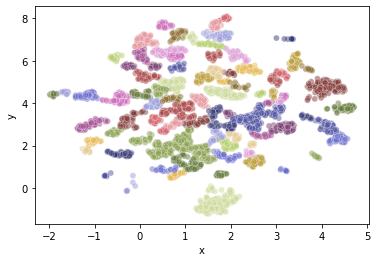

In [116]:
sns.scatterplot(x="x", y = "y", data = scatter_df[(scatter_df['cluster_labels']!=-1)], hue = 'cluster_labels', palette = 'tab20b',legend = False, alpha = 0.5)

## TOP TWEETS

In [117]:
scatter_df['prob'] = clusterer.probabilities_

In [118]:
df_clusters = []
for idx, grp in scatter_df[(scatter_df['cluster_labels']!=-1)].groupby('cluster_labels'):
    sorted_grp = grp.sort_values(by='prob',ascending = False)
    print('Top Tweets for Cluster {} with probabilities {}'.format(idx,sorted_grp['prob'].tolist()[:10]))
    print(sorted_grp['tweets'].tolist()[:10])
    print('-----------------------------------------------------------------')
    
    n = sorted_grp.shape[0]
    df_t = pd.DataFrame()
    df_t['cluster_id'] = [idx]*n
    df_t['tweet'] = sorted_grp['tweets'].tolist()
    df_t['probability'] = sorted_grp['prob'].tolist()
    df_t['screen_name'] = sorted_grp['screen_name'].tolist()
    df_clusters.append(df_t)

Top Tweets for Cluster 0 with probabilities [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
['‡§¶‡•á‡§∂ ‡§§‡•ã‡§°‡§º‡§®‡•á ‡§µ‡§æ‡§≤‡•ã‡§Ç ‡§™‡§∞ ‡§®‡§π‡•Ä‡§Ç ‡§¶‡•á‡§∂ ‡§ú‡•ã‡§°‡§º‡§®‡•á ‡§µ‡§æ‡§≤‡•ã‡§Ç ‡§™‡§∞ ‡§Æ‡§ß‡•ç‡§Ø‡§™‡•ç‡§∞‡§¶‡•á‡§∂ ‡§ï‡•Ä ‡§ï‡§æ‡§Ç‡§ó‡•ç‡§∞‡•á‡§∏ ‡§∏‡§∞‡§ï‡§æ‡§∞ ‡§®‡•á ‡§ï‡•á‡§∏ ‡§¶‡§∞‡•ç‡§ú ‡§ï‡§ø‡§Ø‡§æ ‡§π‡•à ‡§ú‡§ø‡§®‡•ç‡§π‡•ã‡§Ç‡§®‡•á ‡§§‡§ø‡§∞‡§Ç‡§ó‡§æ ‡§Ø‡§æ‡§§‡•ç‡§∞‡§æ ‡§®‡§ø‡§ï‡§æ‡§≤‡•Ä ‡§•‡•Ä ‡§õ‡§™‡§æ‡§ï‡§®‡§æ‡§•', '‡§â‡§§‡•ç‡§§‡§∞‡§™‡•ç‡§∞‡§¶‡•á‡§∂ ‡§ï‡•á ‡§Æ‡•Å‡§ñ‡•ç‡§Ø‡§Æ‡§Ç‡§§‡•ç‡§∞‡•Ä ‡§¶‡§ø‡§≤‡•ç‡§≤‡•Ä ‡§ö‡•Å‡§®‡§æ‡§µ ‡§Æ‡•á‡§Ç ‡§™‡•ç‡§∞‡§ö‡§æ‡§∞ ‡§ï‡§∞‡§®‡•á ‡§ï‡•ç‡§Ø‡§æ ‡§ó‡§è ‡§Ö‡§Ç‡§ß‡§≠‡§ï‡•ç‡§§‡•ã ‡§®‡•á ‡§∏‡§∞‡§ï‡§æ‡§∞‡•Ä ‡§π‡•â‡§∏‡•ç‡§™‡§ø‡§ü‡§≤ ‡§™‡§∞ ‡§π‡•Ä ‡§ï‡§¨‡•ç‡§ú‡§º‡§æ ‡§ï‡§∞ ‡§≤‡§ø‡§Ø‡§æ üòä ‡§¶‡§ø‡§≤‡•ç‡§≤‡•Ä_‡§Æ‡•á‡§Ç_‡§Ø‡•ã‡§ó‡•Ä_‡§ï‡•Ä_‡§¶‡§π‡§æ‡§°‡§º ‡§∂‡§æ‡§π‡•Ä‡§®_‡§¨‡§æ‡§ó_‡§¨‡§ö‡§æ‡§è‡§ó‡§æ_‡§∏‡§Ç‡§µ‡§ø‡§ß‡§æ‡§® ‡§¶‡§ø‡§≤‡•ç‡§≤‡•Ä_‡§ï‡•Ä_‡§Æ‡§æ‡§≤‡§ø‡§ï_‡§ú‡§®‡§§‡§æ', '‡§õ‡§§‡•ç‡§§‡•Ä‡§∏‡§ó‡§¢‡§º ‡§∞‡§æ‡§ú‡§∏‡•ç‡

Top Tweets for Cluster 85 with probabilities [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
['i repeat amitshah amp his party are the real amp only credible tukdetukdegang  this man cannot utter a healing word he doesnt know about healing words all he can speak about is what is abrasive amp divisive caanrcnpr caanrcnpr caanrcprotests ', '‡§Ü‡§ñ‡§ø‡§∞ ‡§∂‡§æ‡§π‡•Ä‡§®_‡§¨‡§æ‡§ó_‡§ï‡•Ä_‡§¨‡§ø‡§ï‡§æ‡§ä_‡§î‡§∞‡§§‡•á ‡§ï‡•ç‡§Ø‡•ã‡§Ç ‡§≤‡§°‡§º ‡§ó‡§à‡§Ç ‡§ï‡•ã‡§à ‡§≤‡§ø‡§¨‡§∞‡§≤ ‡§¨‡§§‡§æ‡§è‡§ó‡§æ ‡§ï‡•ç‡§Ø‡§æ ü§î', '‡§ï‡§∞‡•Å‡§£‡§æ‡§Æ‡§Ø ‡§Æ‡§æ‡§Ç ‡§ï‡•ã ‡§≠‡•Ç‡§ñ‡•Ä ‡§™‡•ç‡§Ø‡§æ‡§∏‡•Ä ‡§ï‡§Æ‡§∞‡•á ‡§Æ‡•á‡§Ç ‡§¨‡§Ç‡§¶ ‡§ï‡§∞ ‡§¨‡§π‡•Ç ‡§î‡§∞ ‡§¨‡•á‡§ü‡§æ ‡§®‡§ø‡§ï‡§≤‡•á ‡§¶‡§ø‡§≤‡•ç‡§≤‡•Ä ‡§ï‡•á ‡§∂‡§æ‡§π‡•Ä‡§® ‡§¨‡§æ‡§ó ‡§Æ‡•á‡§Ç ‡§Æ‡•å‡§ú ‡§Æ‡§∏‡•ç‡§§‡•Ä ‡§ï‡§∞‡§®‡•á 10 ‡§¶‡§ø‡§® ‡§∏‡•á ‡§ï‡§Æ‡§∞‡•á ‡§Æ‡•á‡§Ç ‡§¨‡§Ç‡§¶ ‡§•‡•Ä ‡§¨‡•Å‡§ú‡•Å‡§∞‡•ç‡§ó ‡§Æ‡§π‡§ø‡§≤‡§æ ‡§Ö‡§≤‡•Ä‡§ó‡§¢‡§º ‡§Æ‡•ã‡§π‡§≤‡•ç‡§≤‡§æ ‡§∂‡•á‡§ñ‡§æ‡§® ‡§Ö‡§™‡§∞ ‡§ï‡•ã‡§ü ‡§ï‡§æ ‡§Ø‡§π ‡§µ‡§ø‡§°‡§ø‡§Ø‡•ã ‡§ú‡§∞‡•Ç‡§∞ 

In [119]:
pd.concat(df_clusters, ignore_index = True).to_excel("./data/caanrc_clusters_tweets.xlsx", index = None)